In [90]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from typing import Union
from scipy.fft import fft, ifft, fftfreq
from scipy.optimize import curve_fit

In [61]:
pattern_PbTe_10_10 = os.path.join('3-PbTe-thinfilm', 'PbTe', '20-20', '*.dat')
dat_files_list_PbTe_10_10 = glob.glob(pattern_PbTe_10_10, recursive=True)

pattern_substrato_10_10 = os.path.join('3-PbTe-thinfilm', 'substrato', '20-20', '*.dat')
dat_files_list_substrato_10_10 = glob.glob(pattern_substrato_10_10, recursive=True)

In [62]:
dict_with_all_dfs_PbTe_10_10 = {}
for path in dat_files_list_PbTe_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_PbTe_10_10[df_name] = [df, temperature]

In [63]:
dict_with_all_dfs_substrato_10_10 = {}
for path in dat_files_list_substrato_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_substrato_10_10[df_name] = [df, temperature]

In [64]:
temperatures = []
dict_with_mean_dfs_PbTe_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_PbTe_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_PbTe_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_PbTe_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [65]:
temperatures = []
dict_with_mean_dfs_substrato_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_substrato_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_substrato_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_substrato_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [66]:
c = 3e8 # meter per second
N = len(dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'])
d_film = 0.0016e-3
n_sample = 2.56
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um \nn_sample = {n_sample}")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um 
n_sample = 2.56


In [67]:
# Making all df's have the same length

N_len_diff = dict_with_mean_dfs_substrato_10_10['300K'][0].shape[0] - dict_with_mean_dfs_PbTe_10_10['300K'][0].shape[0]
# print(N_len_diff)
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0] = df[0][(N_len_diff):].reset_index(drop=True)

In [68]:
print(dict_with_mean_dfs_substrato_10_10['300K'][0])

        pos             X
0    57.000 -2.273745e-13
1    57.005  1.136880e-13
2    57.010 -2.273755e-13
3    57.015 -6.821250e-13
4    57.020  2.273755e-13
..      ...           ...
596  59.980  1.932690e-12
597  59.985  1.136875e-13
598  59.990 -4.547495e-13
599  59.995 -1.705315e-12
600  60.000 -2.046370e-12

[601 rows x 2 columns]


In [69]:
# id_max_X = dict_with_mean_dfs_substrato_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][0])*2e-3/c

In [70]:
# id_max_X = dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_PbTe_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][0])*2e-3/c

In [71]:
print(dict_with_mean_dfs_substrato_10_10['300K'][0].shape)

(601, 3)


In [72]:
time_step = dict_with_mean_dfs_substrato_10_10['300K'][0]['time_moment'][1] - dict_with_mean_dfs_substrato_10_10['300K'][0]['time_moment'][0]
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um \ntime step = {time_step*1e12:1.3f} ps")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um 
time step = 0.033 ps


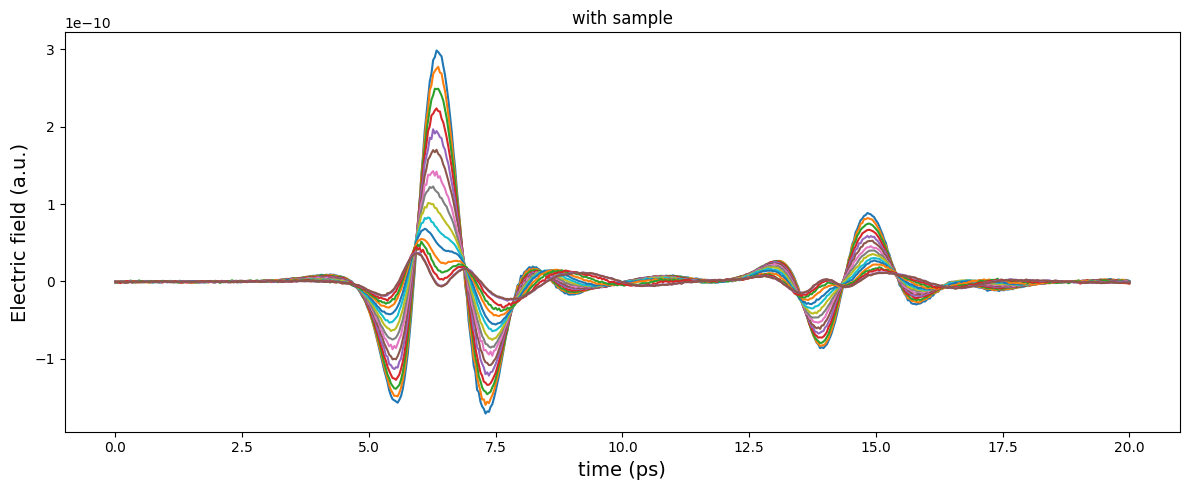

In [73]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_PbTe_10_10.items():
    # if df[1]<200:
    #     continue
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_title('with sample')
ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

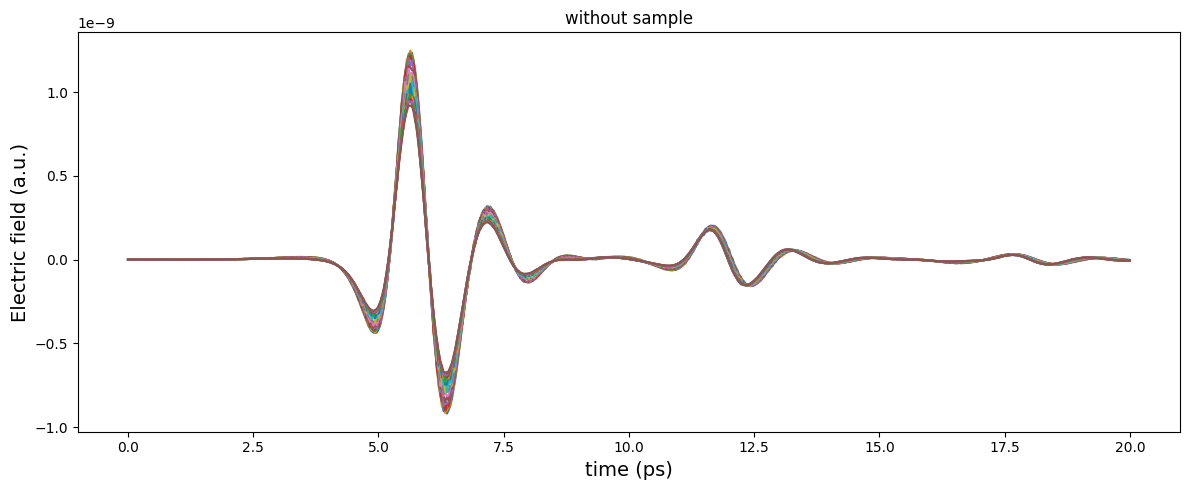

In [74]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_substrato_10_10.items():
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_title('without sample')
ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

# Windowing

Windowing is a technique to mitigate artifacts produced by multiple reflections and limited time window. The simplest window is a rectangular one, which consists in truncating the data before the reflections. Since you're reducing the time window you'll have less data points, and hence you lose spectral resolution. To recover (and even enhance) the spectral resolution we can just add zeros after the truncation point (or at the beginning of the data), this technique is called **zero padding**. This truncation sometimes is sufficient to retrieve frequencies values, but it lacks of information about the spectral amplitude (see section 3.2 in this [paper](https://link.springer.com/article/10.1007/s10762-025-01092-2)), that's where other windows play a role. In this notebook I'll test some functions as windows (e.g. gaussian window), and how to implement in the code and data analysis.



In [75]:
def apply_window(
    df_ref: pd.DataFrame,
    df_sample: pd.DataFrame,
    t_ref_refl: float,
    t_sample_refl: float,
    N_zero_padding: int,
    function: str,
    params: list,
    n_sub: Union[float, np.ndarray],
    delta_L: float,
    L: float
) -> np.ndarray: 
    """
    Processes THz-TDS data applying windowing and extracting the complex transmittance.

    The function performs zero-padding, aligns the main peaks of reference and sample
    pulses, applies a window function to filter reflections, and calculates the 
    complex transmittance transfer function via FFT.

    Parameters
    ----------
    df_ref : pd.DataFrame
        Reference pulse data. Must contain columns:
        - 'time_moment': Time in picoseconds (ps).
        - 'X': Electric field amplitude (a.u.).
    
    df_sample : pd.DataFrame
        Sample pulse data. Must contain columns:
        - 'time_moment': Time in picoseconds (ps).
        - 'X': Electric field amplitude (a.u.).

    t_ref_refl : float
        Time (ps) where the first reflection starts for the reference pulse.

    t_sample_refl : float
        Time (ps) where the first reflection starts for the sample pulse.

    N_zero_padding : int
        New array length after zero-padding (e.g., 4096).

    function : str
        Window type: 'gaussian' or 'flattop'.

    params : list of float
        Window parameters. 
        - If 'gaussian': [sigma].
            sigma -> standard deviation of the Gaussian window (in picoseconds).
        - If 'flattop': [N_win].
            N_win -> range of the flattop window (in number of points). The point out of this range will be zero.

    n_sub : float or numpy.ndarray
        Refractive index of the substrate. Can be a single float value 
        (constant index) or an array (frequency-dependent index).

    delta_L : float
        Difference in substrates thickness (millimeters).

    L : float
        Sample + substrate thickness (millimeters).

    plots_array : list of bool, optional
        List indicating which plots to generate during processing.

    Returns
    -------
    freqs : numpy.ndarray
            The positive frequencies array.

    T : numpy.ndarray
        The complex transmittance array (frequency domain).
        Note that this array corresponds to the positive frequencies calculated
        by the FFT.
    
    See Also
    --------
    scipy.fft.fft : The function used for the Fourier Transform.
    """
    #copy to not change original dataframes
    ref_df = df_ref.copy()
    sample_df = df_sample.copy()

    #

    # Calculate time step and dataframe lengths
    t_ref_refl = t_ref_refl*1e-12
    t_sample_refl = t_sample_refl*1e-12
    time_step = ref_df['time_moment'][1] - ref_df['time_moment'][0]
    N_ref = ref_df.shape[0]
    N = sample_df.shape[0]
    pulse_duration = sample_df['time_moment'][N_ref-1]
    c = 299792458 # m/s

    # Pulse Truncation
    idx_ref_trunc = np.argmin(np.abs(ref_df['time_moment'] - t_ref_refl))
    ref_df_trunc = ref_df.loc[0:idx_ref_trunc].copy()
    idx_sample_trunc = np.argmin(np.abs(sample_df['time_moment'] - t_sample_refl))
    sample_df_trunc = sample_df.loc[0:idx_sample_trunc].copy()

    # # If dataframes lengths are different, use zero padding to make N_sample = N_ref
    # if N_ref > N_sample:
    #     delta_N = N_ref - N_sample
    #     tf = sample_df['time_moment'][N_sample-1]
    #     zero_padding_length_mismatch = pd.DataFrame({'pos': np.zeros(delta_N), 'X': np.zeros(delta_N), 'time_moment': np.zeros(delta_N)})
    #     sample_df = pd.concat([zero_padding_length_mismatch, sample_df], ignore_index=True)
    #     N = N_sample + delta_N
    #     sample_df['time_moment'] = np.linspace(0, time_step * (N-1), N)
    # elif N_sample > N_ref:
    #     delta_N = N_sample - N_ref
    #     tf = ref_df['time_moment'][N_ref-1]
    #     zero_padding_length_mismatch = pd.DataFrame({'pos': np.zeros(delta_N), 'X': np.zeros(delta_N), 'time_moment': np.zeros(delta_N)})
    #     ref_df = pd.concat([zero_padding_length_mismatch, ref_df], ignore_index=True)
    #     N = N_ref + delta_N
    #     ref_df['time_moment'] = np.linspace(0, time_step * (N-1), N)

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df)
    #     print(ref_df)

    # Zero padding
    N_orig = len(ref_df)
    new_center_index = N_zero_padding // 2 
    t_peak_ref_id_zp = ref_df['X'].idxmax()
    pad_left = new_center_index - t_peak_ref_id_zp
    pad_right = N_zero_padding - (N_orig + pad_left)
    start_time_index = -pad_left
    new_time_array = np.arange(start_time_index, start_time_index + N_zero_padding) * time_step
    sample_df = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(sample_df['X'], (pad_left, pad_right), mode='constant')
    })
    
    ref_df = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(ref_df['X'], (pad_left, pad_right), mode='constant')
    })
    N = N_zero_padding

    # Zero padding for truncated pulses
    new_center_index = N_zero_padding // 2 
    t_peak_ref_trunc_id_zp = ref_df_trunc['X'].idxmax()
    pad_left = new_center_index - t_peak_ref_trunc_id_zp
    pad_right_ref = N_zero_padding - (len(ref_df_trunc) + pad_left)
    pad_right_sample = N_zero_padding - (len(sample_df_trunc) + pad_left)
    start_time_index = -pad_left
    new_time_array = np.arange(start_time_index, start_time_index + N_zero_padding) * time_step
    sample_df_trunc = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(sample_df_trunc['X'], (pad_left, pad_right_sample), mode='constant')
    })
    
    ref_df_trunc = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(ref_df_trunc['X'], (pad_left, pad_right_ref), mode='constant')
    })

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df.shape)
    #     print(sample_df)

    # Find time moment for main pulse and reflection peaks after zero padding
    t_peak_sample_id = sample_df['X'].idxmax()
    t_peak_ref_id = ref_df['X'].idxmax()
    t_peak_ref = ref_df['time_moment'][t_peak_ref_id]
    t_peak_sample = sample_df['time_moment'][t_peak_sample_id]

    # Amplitude normalization factors
    peak_max_ref = ref_df['X'][t_peak_ref_id]
    peak_max_sample = sample_df['X'][t_peak_sample_id]

    # Plotting peaks before alignment
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax.plot(ref_df['time_moment']*1e12, ref_df['X']/peak_max_ref+3, 'r')
    ax.plot(sample_df['time_moment']*1e12, sample_df['X']/peak_max_sample, 'b')
    ax.annotate(
    r'$t_{ref}^{refl}$',
    xy=(t_ref_refl*1e12, 3.05),
    xytext=(t_ref_refl*1e12, 3.7),
    fontsize=12,
    arrowprops=dict(
        facecolor='red',
        width=2,
        shrink=0.05,
        headwidth=4,
        headlength=6
    )
    )
    ax.annotate(
    r'$t_{sam}^{refl}$',
    xy=(t_sample_refl*1e12, 0.1),
    xytext=(t_sample_refl*1e12, 0.8),
    fontsize=12,
    arrowprops=dict(
        facecolor='blue',
        width=2,
        shrink=0.05,
        headwidth=4,
        headlength=6
    )
    )
    ax.set_xlabel('Time (ps)', fontsize=14)
    ax.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax.legend(['reference', 'sample'], fontsize = 10)
    ax.set_title(r'$t_{ref}^{max}$'+ f'= {t_peak_ref*1e12:1.2f} ps' + '   '+ r'$t_{sam}^{max}$' + f'= {t_peak_sample*1e12: 1.2f} ps'+ '   '+ r'$t_{ref}^{refl}$' + f'= {t_ref_refl*1e12: 1.2f} ps'+ '   '+ r'$t_{sam}^{refl}$' + f'= {t_sample_refl*1e12: 1.2f} ps', fontsize=14)
    # ax.set_xticks(np.arange(0, 21, 1))
    ax.set_ylim((-1, 4.25))
    ax.set_xlim((0, pulse_duration*1e12))

    # Plotting inset
    t_ref_refl_id = (ref_df['time_moment'][ref_df['time_moment'] - t_ref_refl < time_step/2]).idxmax()
    t_sample_refl_id = (sample_df['time_moment'][sample_df['time_moment'] - t_sample_refl < time_step/2]).idxmax()
    axins = ax.inset_axes([0.67, 0.43, 0.3, 0.25])
    axins.plot(ref_df['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
    axins.plot(sample_df['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - t_sample_refl*1e12, sample_df['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
    axins.set_xlabel(r'$t - t^{ref}$ (ps)')
    # axins.set_xlim((-1,0))

    # Aligning peaks
    delta_t_max_id = t_peak_ref_id - t_peak_sample_id
    delta_t_max = t_peak_ref - t_peak_sample
    if delta_t_max_id > 0:
        time_array = sample_df['time_moment'].copy()
        sample_df = sample_df.drop(sample_df.index[N-delta_t_max_id:]).reset_index(drop=True)
        sample_df_trunc = sample_df_trunc.drop(sample_df_trunc.index[N-delta_t_max_id:]).reset_index(drop=True)
        sample_df = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df['X'], (delta_t_max_id, 0), mode='constant')
        })
        sample_df_trunc = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df_trunc['X'], (delta_t_max_id, 0), mode='constant')
        })
    elif delta_t_max_id < 0:
        time_array = sample_df['time_moment'].copy()
        sample_df = sample_df.drop(sample_df.index[0:(-delta_t_max_id)]).reset_index(drop=True)
        sample_df_trunc = sample_df_trunc.drop(sample_df_trunc.index[0:(-delta_t_max_id)]).reset_index(drop=True)
        sample_df = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df['X'], (0, -delta_t_max_id), mode='constant')
        })
        sample_df_trunc = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df_trunc['X'], (0, -delta_t_max_id), mode='constant')
        })

    # sample_df['time_moment'] = sample_df['time_moment'] + delta_t_max
    # sample_df_trunc['time_moment'] = sample_df_trunc['time_moment'] + delta_t_max

    # Plotting aligned peaks
    fig2, ax2 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax2.plot(ref_df['time_moment']*1e12, ref_df['X'] / peak_max_ref, 'r')
    ax2.plot(sample_df['time_moment']*1e12, sample_df['X'] / peak_max_sample, 'b')
    ax2.set_xlabel('Time (ps)', fontsize = 14)
    ax2.set_ylabel('Electric Field (a.u.)', fontsize = 14)
    ax2.legend(['reference', 'sample'], fontsize = 10)
    ax2.set_xticks(np.arange(0, 21, 1))
    ax2.set_xlim((0, pulse_duration*1e12))

    # Plotting truncated pulses
    fig9, ax9 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax9.plot(ref_df_trunc['time_moment']*1e12, ref_df_trunc['X'] / peak_max_ref, 'r')
    ax9.plot(sample_df_trunc['time_moment']*1e12, sample_df_trunc['X'] / peak_max_sample, 'b')
    ax9.set_xlabel('Time (ps)', fontsize = 14)
    ax9.set_ylabel('Electric Field (a.u.)', fontsize = 14)
    ax9.legend(['reference', 'sample'], fontsize = 10)
    ax9.set_xticks(np.arange(0, 21, 1))
    ax9.set_xlim((0, pulse_duration*1e12))

    # Plotting inset with truncated pulses
    t_ref_refl_id = (ref_df_trunc['time_moment'][ref_df_trunc['time_moment'] - t_ref_refl < time_step/2]).idxmax()
    t_sample_refl_id = (sample_df_trunc['time_moment'][sample_df_trunc['time_moment'] - (t_sample_refl+delta_t_max) < time_step/2]).idxmax()
    axins2 = ax9.inset_axes([0.55, 0.6, 0.43, 0.23])
    axins2.plot(ref_df_trunc['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df_trunc['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
    axins2.plot(sample_df_trunc['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - (t_sample_refl + delta_t_max)*1e12, sample_df_trunc['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
    axins2.set_xlabel(r'$t - t^{ref}$ (ps)')
    
    # Applying the window function
    if function == 'gaussian':
        params_gaussian = [t_peak_ref, params[0], peak_max_ref]
        time_column = sample_df['time_moment']
        window = _gaussian_window(time_column, *params_gaussian)
        param_string = r'$\sigma$' + f'={params[0]*1e12:1.2f} ps'

        # sample dataframe
        X_windowed_sample = sample_df['X'] * window
        sample_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_sample})

        # reference dataframe
        X_windowed_ref = ref_df['X'] * window
        ref_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_ref})

    if function == 'flattop':
        params_flattop = [N, t_peak_ref_id, params[0]]
        time_column = sample_df['time_moment']
        window = _flattop_window(*params_flattop)
        param_string = r'$N_{win}$' + f'={params[0]} points'

        # sample dataframe
        X_windowed_sample = sample_df['X'] * window
        sample_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_sample})

        # reference dataframe
        X_windowed_ref = ref_df['X'] * window
        ref_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_ref})

    # plotting windowed reference data
    fig, ax3 = plt.subplots(figsize = (10, 4), tight_layout = True)
    ax3.plot(time_column*1e12, ref_df['X'] / max(ref_df['X']) + 2, 'b')
    ax3.plot(time_column*1e12, window / max(window) + 2, 'k')
    ax3.plot(time_column*1e12, ref_df_windowed['X'] / max(ref_df_windowed['X']), 'b')
    ax3.set_xlabel('Time (ps)', fontsize=14)
    ax3.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax3.set_title('Reference Pulse with ' + function + ' window ' + param_string, fontsize=12)
    ax3.set_xlim((-pulse_duration*1e12 + 2*t_peak_ref*1e12, pulse_duration*1e12))

    # plotting windowed sample data
    fig, ax4 = plt.subplots(figsize = (10, 4), tight_layout = True)
    ax4.plot(time_column*1e12, sample_df['X'] / max(sample_df['X']) + 2, 'b')
    ax4.plot(time_column*1e12, window / max(window) + 2, 'k')
    ax4.plot(time_column*1e12, sample_df_windowed['X'] / max(sample_df_windowed['X']), 'b')
    ax4.set_xlabel('Time (ps)', fontsize=14)
    ax4.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax4.set_title('Sample Pulse with ' + function + ' window ' + param_string, fontsize=12)
    ax4.set_xlim((-pulse_duration*1e12 + 2*t_peak_ref*1e12, pulse_duration*1e12))

    # plotting the window function fft
    fig, ax10 = plt.subplots(figsize = (10, 4), tight_layout = True)
    window_fft = np.conj(fft(window))
    freqs_window = fftfreq(N, time_step)
    ax10.semilogy(freqs_window*1e-12, np.abs(window_fft), 'k')
    ax10.set_xlabel('Frequency (THz)', fontsize = 14)
    ax10.set_ylabel('Amplitude (a.u.)', fontsize = 14)
    ax10.set_title('Window Function FFT', fontsize = 12)
    ax10.set_xlim((-1.5, 1.5))

    # Calculating the FFTs
    freqs = fftfreq(N, time_step)[:N//2]
    sample_df_fft = np.conj(fft(sample_df_windowed['X']))[:N//2] * np.exp(-1j * 2 * np.pi * freqs * delta_t_max)
    ref_df_fft = np.conj(fft(ref_df_windowed['X']))[:N//2]
    sample_df_trunc_fft = np.conj(fft(sample_df_trunc['X']))[:N//2] * np.exp(-1j * 2 * np.pi * freqs * delta_t_max)
    ref_df_trunc_fft = np.conj(fft(ref_df_trunc['X']))[:N//2]

    # Plotting FFT
    max_freq_id = len(freqs[freqs < 1.5e12])
    fig, ax5 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(ref_df_fft[:max_freq_id]), 'r')
    ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(sample_df_fft[:max_freq_id]), 'b')
    # ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(ref_df_trunc_fft[:max_freq_id]), 'r-')
    # ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(sample_df_trunc_fft[:max_freq_id]), 'b-')
    # ax5.legend(['Reference windowed', 'Sample windowed', 'Reference truncated', 'Sample truncated'])
    ax5.legend(['Reference windowed', 'Sample windowed'])
    ax5.set_xlabel('Frequency (THz)', fontsize = 14)
    ax5.set_ylabel('Amplitude (a.u.)', fontsize = 14)
    ax5.set_xlim((0.2, 1.5))
    ax5.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Calculating the film transmittance
    T = (sample_df_fft / ref_df_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
    T_trunc = (sample_df_trunc_fft / ref_df_trunc_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
    # print(max(abs(np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c))))

    # Plotting the transmittance
    fig, ax6 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax6.semilogy(freqs[:max_freq_id]*1e-12, np.abs(T[:max_freq_id])**2, 'b')
    ax6.semilogy(freqs[:max_freq_id]*1e-12, np.abs(T_trunc[:max_freq_id])**2, 'r')
    ax6.set_xlabel('Frequency (THz)', fontsize = 14)
    ax6.set_ylabel('Transmittance', fontsize = 14)
    ax6.legend(['Windowed', 'Truncated'], fontsize = 10)
    ax6.set_xlim((0.2, 1.5))
    ax6.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Calculating the complex permittivity
    e_film = 1j * (1 + n_sub) * ((1 / T[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub
    e_film_trunc = 1j * (1 + n_sub) * ((1 / T_trunc[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub

    # Plotting the permittivity real part
    fig, ax7 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax7.plot(freqs[:max_freq_id]*1e-12, np.real(e_film[:max_freq_id])/1e3, 'b')
    ax7.plot(freqs[:max_freq_id]*1e-12, np.real(e_film_trunc[:max_freq_id])/1e3, 'r')
    ax7.set_xlabel('Frequency (THz)', fontsize = 14)
    ax7.set_ylabel(r'$\epsilon_1$ ($10^3$)', fontsize = 14)
    ax7.legend(['Windowed', 'Truncated'], fontsize = 10)
    ax7.set_xlim((0.2, 1.5))
    ax7.set_ylim((-40, 40))
    ax7.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Plotting the permittivity imaginary part
    fig, ax8 = plt.subplots(figsize = (10, 4), tight_layout=True)
    ax8.plot(freqs[:max_freq_id]*1e-12, np.imag(e_film[:max_freq_id])/1e3, 'b')
    ax8.plot(freqs[:max_freq_id]*1e-12, np.imag(e_film_trunc[:max_freq_id])/1e3, 'r')
    ax8.set_xlabel('Frequency (THz)', fontsize = 14)
    ax8.set_ylabel(r'$\epsilon_2$ ($10^3$)', fontsize = 14)
    ax8.legend(['Windowed', 'Truncated'], fontsize = 10)
    ax8.set_xlim((0.2, 1.5))
    ax8.set_ylim((-10, 50))
    ax8.set_xticks(np.arange(0.2, 1.5, 0.1))

    return freqs, T

def _gaussian_window(x, x_0, sigma, A):
    return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))

def _flattop_window(N, t0_id, N_win):
    a0, a1, a2, a3, a4 = 0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368
    pi = np.pi
    flattop = np.zeros(N)
    for n in range(N_win):
        flattop[t0_id - N_win//2 + n] = (a0 
                      - a1 * np.cos(2 * pi * n / N_win) 
                      + a2 * np.cos(4 * pi * n / N_win) 
                      - a3 * np.cos(6 * pi * n / N_win) 
                      + a4 * np.cos(8 * pi * n / N_win))
    return flattop


In [165]:
def apply_window_v2(
    df_ref: pd.DataFrame,
    df_sample: pd.DataFrame,
    t_ref_refl: float,
    t_sample_refl: float,
    N_zero_padding: int,
    function: str,
    params: list,
    n_sub: Union[float, np.ndarray],
    delta_L: float,
    L: float,
    show_trunc: bool = True,
    plots_array: list = None
) -> np.ndarray: 
    """
    Processes THz-TDS data applying windowing and extracting the complex transmittance.

    The function performs zero-padding, aligns the main peaks of reference and sample
    pulses, applies a window function to filter reflections, and calculates the 
    complex transmittance transfer function via FFT.

    Parameters
    ----------
    df_ref : pd.DataFrame
        Reference pulse data. Must contain columns:
        - 'time_moment': Time in picoseconds (ps).
        - 'X': Electric field amplitude (a.u.).
    
    df_sample : pd.DataFrame
        Sample pulse data. Must contain columns:
        - 'time_moment': Time in picoseconds (ps).
        - 'X': Electric field amplitude (a.u.).

    t_ref_refl : float
        Time (ps) where the first reflection starts for the reference pulse.

    t_sample_refl : float
        Time (ps) where the first reflection starts for the sample pulse.

    N_zero_padding : int
        New array length after zero-padding (e.g., 4096).

    function : str
        Window type: 'gaussian' or 'flattop'.

    params : list of float
        Window parameters. 
        - If 'gaussian': [sigma].
            sigma -> standard deviation of the Gaussian window (in picoseconds).
        - If 'flattop': [N_win].
            N_win -> range of the flattop window (in number of points). The point out of this range will be zero.

    n_sub : float or numpy.ndarray
        Refractive index of the substrate. Can be a single float value 
        (constant index) or an array (frequency-dependent index).

    delta_L : float
        Difference in substrates thickness (millimeters).

    L : float
        Sample + substrate thickness (millimeters).

    plots_array : list of bool, optional
        List indicating which plots to generate during processing.

    Returns
    -------
    freqs : numpy.ndarray
            The positive frequencies array.

    T : numpy.ndarray
        The complex transmittance array (frequency domain).
        Note that this array corresponds to the positive frequencies calculated
        by the FFT.
    
    See Also
    --------
    scipy.fft.fft : The function used for the Fourier Transform.
    """
    #copy to not change original dataframes
    ref_df = df_ref.copy()
    sample_df = df_sample.copy()

    # plots array default
    if plots_array is None:
        plots_array = [True]*10

    # Calculate time step and dataframe lengths
    t_ref_refl = t_ref_refl*1e-12
    t_sample_refl = t_sample_refl*1e-12
    time_step = ref_df['time_moment'][1] - ref_df['time_moment'][0]
    N_ref = ref_df.shape[0]
    N = sample_df.shape[0]
    pulse_duration = sample_df['time_moment'][N_ref-1]
    c = 299792458 # m/s

    # Pulse Truncation
    idx_ref_trunc = np.argmin(np.abs(ref_df['time_moment'] - t_ref_refl))
    ref_df_trunc = ref_df.loc[0:idx_ref_trunc].copy()
    idx_sample_trunc = np.argmin(np.abs(sample_df['time_moment'] - t_sample_refl))
    sample_df_trunc = sample_df.loc[0:idx_sample_trunc].copy()

    # Zero padding
    N_orig = len(ref_df)
    new_center_index = N_zero_padding // 2 
    t_peak_ref_id_zp = ref_df['X'].idxmax()
    pad_left = new_center_index - t_peak_ref_id_zp
    pad_right = N_zero_padding - (N_orig + pad_left)
    start_time_index = -pad_left
    new_time_array = np.arange(start_time_index, start_time_index + N_zero_padding) * time_step
    sample_df = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(sample_df['X'], (pad_left, pad_right), mode='constant')
    })
    
    ref_df = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(ref_df['X'], (pad_left, pad_right), mode='constant')
    })
    N = N_zero_padding

    # Zero padding for truncated pulses
    new_center_index = N_zero_padding // 2 
    t_peak_ref_trunc_id_zp = ref_df_trunc['X'].idxmax()
    pad_left = new_center_index - t_peak_ref_trunc_id_zp
    pad_right_ref = N_zero_padding - (len(ref_df_trunc) + pad_left)
    pad_right_sample = N_zero_padding - (len(sample_df_trunc) + pad_left)
    start_time_index = -pad_left
    new_time_array = np.arange(start_time_index, start_time_index + N_zero_padding) * time_step
    sample_df_trunc = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(sample_df_trunc['X'], (pad_left, pad_right_sample), mode='constant')
    })
    
    ref_df_trunc = pd.DataFrame({
        'time_moment': new_time_array, 
        'X': np.pad(ref_df_trunc['X'], (pad_left, pad_right_ref), mode='constant')
    })

    if not show_trunc:
        ref_df_trunc = ref_df.copy() * 0
        sample_df_trunc = sample_df.copy() * 0

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df.shape)
    #     print(sample_df)

    # Find time moment for main pulse and reflection peaks
    t_peak_sample_id = sample_df['X'].idxmax()
    t_peak_ref_id = ref_df['X'].idxmax()
    t_peak_ref = ref_df['time_moment'][t_peak_ref_id]
    t_peak_sample = sample_df['time_moment'][t_peak_sample_id]

    # Amplitude normalization factors
    peak_max_ref = ref_df['X'][t_peak_ref_id]
    peak_max_sample = sample_df['X'][t_peak_sample_id]

    # Plotting peaks before alignment
    if plots_array[0]:
        fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
        ax.plot(ref_df['time_moment']*1e12, ref_df['X']/peak_max_ref+3, 'r')
        ax.plot(sample_df['time_moment']*1e12, sample_df['X']/peak_max_sample, 'b')
        ax.annotate(
        r'$t_{ref}^{refl}$',
        xy=(t_ref_refl*1e12, 3.05),
        xytext=(t_ref_refl*1e12, 3.7),
        fontsize=12,
        arrowprops=dict(
            facecolor='red',
            width=2,
            shrink=0.05,
            headwidth=4,
            headlength=6
        )
        )
        ax.annotate(
        r'$t_{sam}^{refl}$',
        xy=(t_sample_refl*1e12, 0.1),
        xytext=(t_sample_refl*1e12, 0.8),
        fontsize=12,
        arrowprops=dict(
            facecolor='blue',
            width=2,
            shrink=0.05,
            headwidth=4,
            headlength=6
        )
        )
        ax.set_xlabel('Time (ps)', fontsize=14)
        ax.set_ylabel('Electric Field (a.u.)', fontsize=14)
        ax.legend(['reference', 'sample'], fontsize = 10)
        ax.set_title(r'$t_{ref}^{max}$'+ f'= {t_peak_ref*1e12:1.2f} ps' + '   '+ r'$t_{sam}^{max}$' + f'= {t_peak_sample*1e12: 1.2f} ps'+ '   '+ r'$t_{ref}^{refl}$' + f'= {t_ref_refl*1e12: 1.2f} ps'+ '   '+ r'$t_{sam}^{refl}$' + f'= {t_sample_refl*1e12: 1.2f} ps', fontsize=14)
        # ax.set_xticks(np.arange(0, 21, 1))
        ax.set_ylim((-1, 4.25))
        ax.set_xlim((0, pulse_duration*1e12))

        # Plotting inset
        t_ref_refl_id = (ref_df['time_moment'][ref_df['time_moment'] - t_ref_refl < time_step/2]).idxmax()
        t_sample_refl_id = (sample_df['time_moment'][sample_df['time_moment'] - t_sample_refl < time_step/2]).idxmax()
        axins = ax.inset_axes([0.67, 0.43, 0.3, 0.25])
        axins.plot(ref_df['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
        axins.plot(sample_df['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - t_sample_refl*1e12, sample_df['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
        axins.set_xlabel(r'$t - t^{ref}$ (ps)')
        # axins.set_xlim((-1,0))

    # Aligning peaks
    delta_t_max_id = t_peak_ref_id - t_peak_sample_id
    delta_t_max = t_peak_ref - t_peak_sample
    if delta_t_max_id > 0:
        time_array = sample_df['time_moment'].copy()
        sample_df = sample_df.drop(sample_df.index[N-delta_t_max_id:]).reset_index(drop=True)
        sample_df_trunc = sample_df_trunc.drop(sample_df_trunc.index[N-delta_t_max_id:]).reset_index(drop=True)
        sample_df = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df['X'], (delta_t_max_id, 0), mode='constant')
        })
        sample_df_trunc = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df_trunc['X'], (delta_t_max_id, 0), mode='constant')
        })
    elif delta_t_max_id < 0:
        time_array = sample_df['time_moment'].copy()
        sample_df = sample_df.drop(sample_df.index[0:(-delta_t_max_id)]).reset_index(drop=True)
        sample_df_trunc = sample_df_trunc.drop(sample_df_trunc.index[0:(-delta_t_max_id)]).reset_index(drop=True)
        sample_df = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df['X'], (0, -delta_t_max_id), mode='constant')
        })
        sample_df_trunc = pd.DataFrame({
            'time_moment': time_array,
            'X': np.pad(sample_df_trunc['X'], (0, -delta_t_max_id), mode='constant')
        })

    if plots_array[1]:
        # Plotting aligned peaks
        fig2, ax2 = plt.subplots(figsize=(10, 4), tight_layout=True)
        ax2.plot(ref_df['time_moment']*1e12, ref_df['X'] / peak_max_ref, 'r')
        ax2.plot(sample_df['time_moment']*1e12, sample_df['X'] / peak_max_sample, 'b')
        ax2.set_xlabel('Time (ps)', fontsize = 14)
        ax2.set_ylabel('Electric Field (a.u.)', fontsize = 14)
        ax2.legend(['reference', 'sample'], fontsize = 10)
        ax2.set_xticks(np.arange(0, 21, 1))
        ax2.set_xlim((0, pulse_duration*1e12))

    if plots_array[2]:
        # Plotting truncated pulses
        fig9, ax9 = plt.subplots(figsize=(10, 4), tight_layout=True)
        ax9.plot(ref_df_trunc['time_moment']*1e12, ref_df_trunc['X'] / peak_max_ref, 'r')
        ax9.plot(sample_df_trunc['time_moment']*1e12, sample_df_trunc['X'] / peak_max_sample, 'b')
        ax9.set_xlabel('Time (ps)', fontsize = 14)
        ax9.set_ylabel('Electric Field (a.u.)', fontsize = 14)
        ax9.legend(['reference', 'sample'], fontsize = 10)
        ax9.set_xticks(np.arange(0, 21, 1))
        ax9.set_xlim((0, pulse_duration*1e12))

        # Plotting inset with truncated pulses
        t_ref_refl_id = (ref_df_trunc['time_moment'][ref_df_trunc['time_moment'] - t_ref_refl < time_step/2]).idxmax()
        t_sample_refl_id = (sample_df_trunc['time_moment'][sample_df_trunc['time_moment'] - (t_sample_refl+delta_t_max) < time_step/2]).idxmax()
        axins2 = ax9.inset_axes([0.55, 0.6, 0.43, 0.23])
        axins2.plot(ref_df_trunc['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df_trunc['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
        axins2.plot(sample_df_trunc['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - (t_sample_refl + delta_t_max)*1e12, sample_df_trunc['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
        axins2.set_xlabel(r'$t - t^{ref}$ (ps)')
    
    # Applying the window function
    if function == 'gaussian':
        params_gaussian = [t_peak_ref, params[0], peak_max_ref]
        time_column = sample_df['time_moment']
        window = _gaussian_window(time_column, *params_gaussian)
        param_string = r'$\sigma$' + f'={params[0]*1e12:1.2f} ps'

        # sample dataframe
        X_windowed_sample = sample_df['X'] * window
        sample_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_sample})

        # reference dataframe
        X_windowed_ref = ref_df['X'] * window
        ref_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_ref})

    if function == 'flattop':
        params_flattop = [N, t_peak_ref_id, params[0]]
        time_column = sample_df['time_moment']
        window = _flattop_window(*params_flattop)
        param_string = r'$N_{win}$' + f'={params[0]} points'

        # sample dataframe
        X_windowed_sample = sample_df['X'] * window
        sample_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_sample})

        # reference dataframe
        X_windowed_ref = ref_df['X'] * window
        ref_df_windowed = pd.DataFrame({'time_moment': time_column, 'X': X_windowed_ref})

    if plots_array[3]:
        # plotting windowed reference data
        fig, ax3 = plt.subplots(figsize = (10, 4), tight_layout = True)
        ax3.plot(time_column*1e12, ref_df['X'] / max(ref_df['X']) + 2, 'b')
        ax3.plot(time_column*1e12, window / max(window) + 2, 'k')
        ax3.plot(time_column*1e12, ref_df_windowed['X'] / max(ref_df_windowed['X']), 'b')
        ax3.set_xlabel('Time (ps)', fontsize=14)
        ax3.set_ylabel('Electric Field (a.u.)', fontsize=14)
        ax3.set_title('Reference Pulse with ' + function + ' window ' + param_string, fontsize=12)
        ax3.set_xlim((-pulse_duration*1e12 + 2*t_peak_ref*1e12, pulse_duration*1e12))

    if plots_array[4]:
        # plotting windowed sample data
        fig, ax4 = plt.subplots(figsize = (10, 4), tight_layout = True)
        ax4.plot(time_column*1e12, sample_df['X'] / max(sample_df['X']) + 2, 'b')
        ax4.plot(time_column*1e12, window / max(window) + 2, 'k')
        ax4.plot(time_column*1e12, sample_df_windowed['X'] / max(sample_df_windowed['X']), 'b')
        ax4.set_xlabel('Time (ps)', fontsize=14)
        ax4.set_ylabel('Electric Field (a.u.)', fontsize=14)
        ax4.set_title('Sample Pulse with ' + function + ' window ' + param_string, fontsize=12)
        ax4.set_xlim((-pulse_duration*1e12 + 2*t_peak_ref*1e12, pulse_duration*1e12))

    if plots_array[5]:
        # plotting the window function fft
        fig, ax10 = plt.subplots(figsize = (10, 4), tight_layout = True)
        window_fft = np.conj(fft(window))
        freqs_window = fftfreq(N, time_step)
        ax10.semilogy(freqs_window*1e-12, np.abs(window_fft), 'k')
        ax10.set_xlabel('Frequency (THz)', fontsize = 14)
        ax10.set_ylabel('Amplitude (a.u.)', fontsize = 14)
        ax10.set_title('Window Function FFT', fontsize = 12)
        ax10.set_xlim((-1.5, 1.5))
        ax10.set_xticks(np.arange(-1.6, 1.6, 0.2))

    # Calculating the FFTs
    freqs = fftfreq(N, time_step)[:N//2]
    sample_df_fft = np.conj(fft(sample_df_windowed['X']))[:N//2] * np.exp(-1j * 2 * np.pi * freqs * delta_t_max)
    ref_df_fft = np.conj(fft(ref_df_windowed['X']))[:N//2]
    sample_df_trunc_fft = np.conj(fft(sample_df_trunc['X']))[:N//2] * np.exp(-1j * 2 * np.pi * freqs * delta_t_max)
    ref_df_trunc_fft = np.conj(fft(ref_df_trunc['X']))[:N//2]
    max_freq_id = len(freqs[freqs < 1.5e12])
    min_freq_id = len(freqs[freqs < 0.2e12])

    if plots_array[6]:
        # Plotting FFT
        fig, ax5 = plt.subplots(figsize = (10, 4), tight_layout=True)
        ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(ref_df_fft[:max_freq_id]), 'r')
        ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(sample_df_fft[:max_freq_id]), 'b')
        # ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(ref_df_trunc_fft[:max_freq_id]), 'r-')
        # ax5.semilogy(freqs[:max_freq_id]*1e-12, np.abs(sample_df_trunc_fft[:max_freq_id]), 'b-')
        # ax5.legend(['Reference windowed', 'Sample windowed', 'Reference truncated', 'Sample truncated'])
        ax5.legend(['Reference windowed', 'Sample windowed'])
        ax5.set_xlabel('Frequency (THz)', fontsize = 14)
        ax5.set_ylabel('Amplitude (a.u.)', fontsize = 14)
        ax5.set_xlim((0.2, 1.5))
        ax5.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Calculating the film transmittance
    T = (sample_df_fft / ref_df_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
    T_trunc = (sample_df_trunc_fft / ref_df_trunc_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
    # print(max(abs(np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c))))

    if plots_array[7]:
        # Plotting the transmittance
        fig, ax6 = plt.subplots(figsize = (10, 4), tight_layout=True)
        ax6.semilogy(freqs[:max_freq_id]*1e-12, np.abs(T[:max_freq_id])**2, 'b')
        ax6.semilogy(freqs[:max_freq_id]*1e-12, np.abs(T_trunc[:max_freq_id])**2, 'r')
        ax6.set_xlabel('Frequency (THz)', fontsize = 14)
        ax6.set_ylabel('Transmittance', fontsize = 14)
        ax6.legend(['Windowed', 'Truncated'], fontsize = 10)
        ax6.set_xlim((0.2, 1.5))
        ax6.set_xticks(np.arange(0.2, 1.5, 0.1))

    # Calculating the complex permittivity
    e_film = 1j * (1 + n_sub) * ((1 / T[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub
    e_film_trunc = 1j * (1 + n_sub) * ((1 / T_trunc[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub

    if plots_array[8]:
        # Plotting the permittivity real part
        fig, ax7 = plt.subplots(figsize = (10, 4), tight_layout=True)
        ax7.plot(freqs[1:max_freq_id+1]*1e-12, np.real(e_film[:max_freq_id])/1e3, 'b')
        ax7.plot(freqs[1:max_freq_id+1]*1e-12, np.real(e_film_trunc[:max_freq_id])/1e3, 'r')
        ax7.set_xlabel('Frequency (THz)', fontsize = 14)
        ax7.set_ylabel(r'$\epsilon_1$ ($10^3$)', fontsize = 14)
        ax7.legend(['Windowed', 'Truncated'], fontsize = 10)
        ax7.set_xlim((0.2, 1.5))
        ax7.set_ylim((np.min(np.real(e_film[min_freq_id:max_freq_id])/1e3) - 1, np.max(np.real(e_film[min_freq_id:max_freq_id])/1e3) + 1))
        ax7.set_xticks(np.arange(0.2, 1.5, 0.1))

    if plots_array[9]:
        # Plotting the permittivity imaginary part
        fig, ax8 = plt.subplots(figsize = (10, 4), tight_layout=True)
        ax8.plot(freqs[1:max_freq_id+1]*1e-12, np.imag(e_film[:max_freq_id])/1e3, 'b')
        ax8.plot(freqs[1:max_freq_id+1]*1e-12, np.imag(e_film_trunc[:max_freq_id])/1e3, 'r')
        ax8.set_xlabel('Frequency (THz)', fontsize = 14)
        ax8.set_ylabel(r'$\epsilon_2$ ($10^3$)', fontsize = 14)
        ax8.legend(['Windowed', 'Truncated'], fontsize = 10)
        ax8.set_xlim((0.2, 1.5))
        ax8.set_ylim((np.min(np.imag(e_film[min_freq_id:max_freq_id])/1e3) - 1, np.max(np.imag(e_film[min_freq_id:max_freq_id])/1e3) + 1))
        ax8.set_xticks(np.arange(0.2, 1.5, 0.1))

    

    return freqs[1+min_freq_id:max_freq_id+1], T[min_freq_id:max_freq_id], e_film[min_freq_id:max_freq_id]

def _gaussian_window(x, x_0, sigma, A):
    return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))

def _flattop_window(N, t0_id, N_win):
    a0, a1, a2, a3, a4 = 0.21557895, 0.41663158, 0.277263158, 0.083578947, 0.006947368
    pi = np.pi
    flattop = np.zeros(N)
    for n in range(N_win):
        flattop[t0_id - N_win//2 + n] = (a0 
                      - a1 * np.cos(2 * pi * n / N_win) 
                      + a2 * np.cos(4 * pi * n / N_win) 
                      - a3 * np.cos(6 * pi * n / N_win) 
                      + a4 * np.cos(8 * pi * n / N_win))
    return flattop


C:\Users\estra\AppData\Local\Temp\ipykernel_23420\1334940985.py:352: RuntimeWarning: invalid value encountered in divide
  T_trunc = (sample_df_trunc_fft / ref_df_trunc_fft) * np.exp(1j * 2 * np.pi * freqs * (1 - n_sub) * delta_L/c)
C:\Users\estra\AppData\Local\Temp\ipykernel_23420\1334940985.py:368: RuntimeWarning: invalid value encountered in divide
  e_film_trunc = 1j * (1 + n_sub) * ((1 / T_trunc[1:]) - 1) * c / (2 * np.pi * freqs[1:] * L) - n_sub


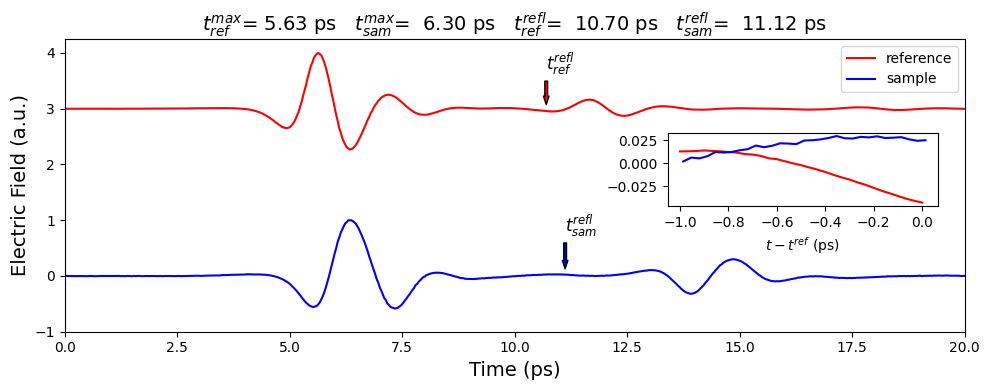

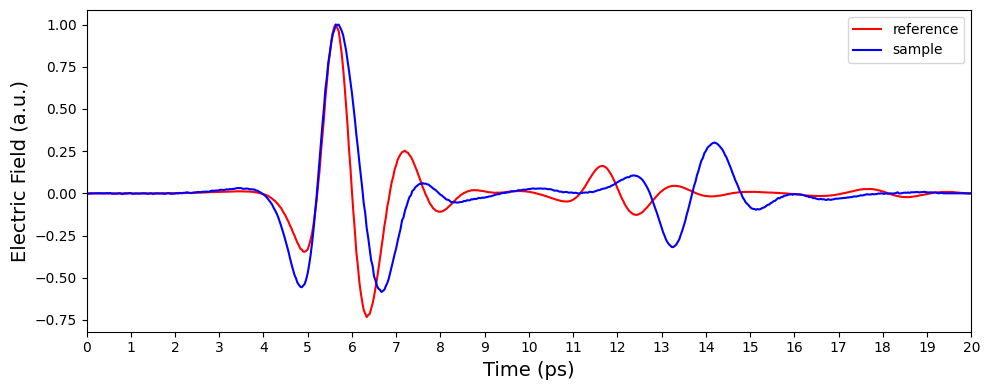

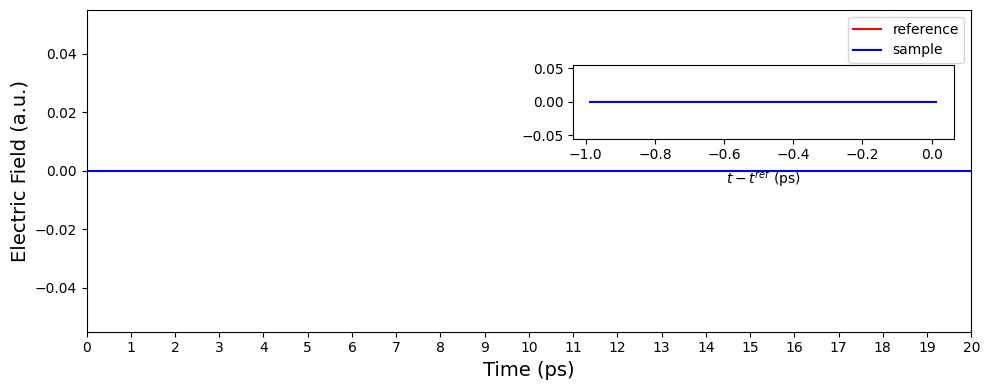

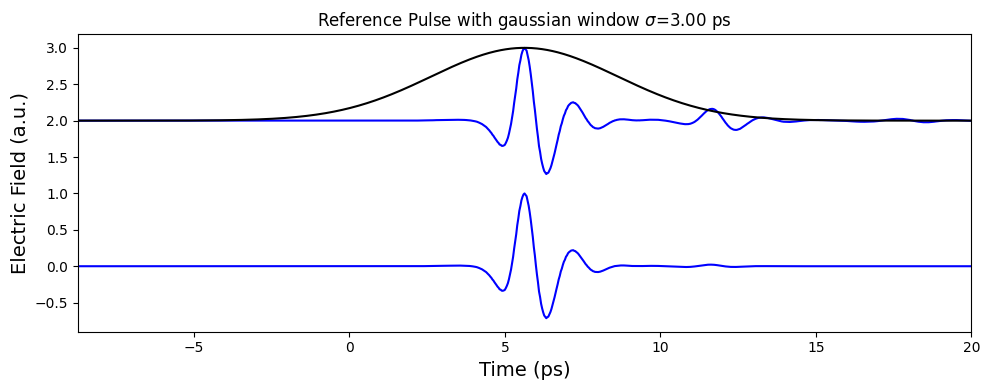

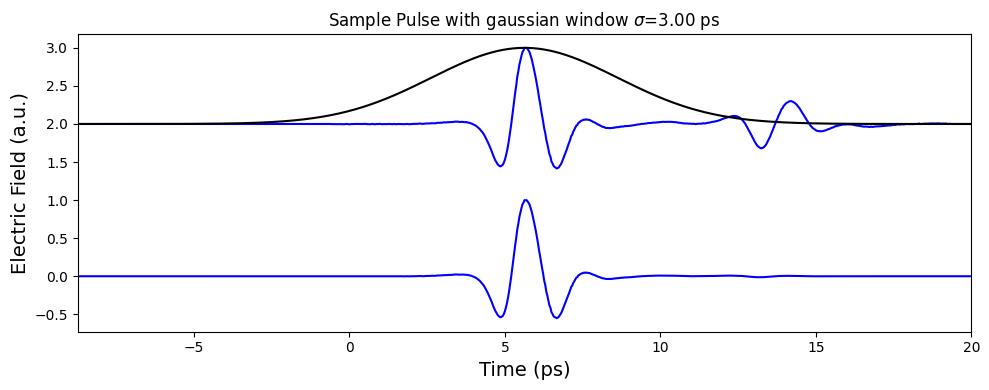

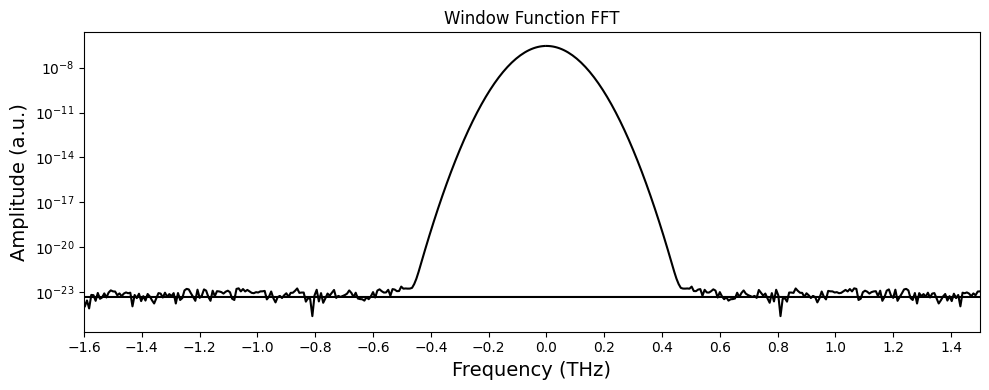

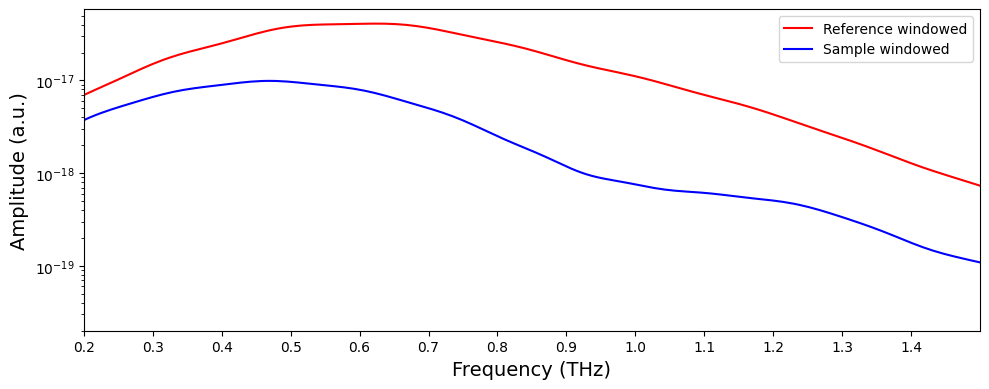

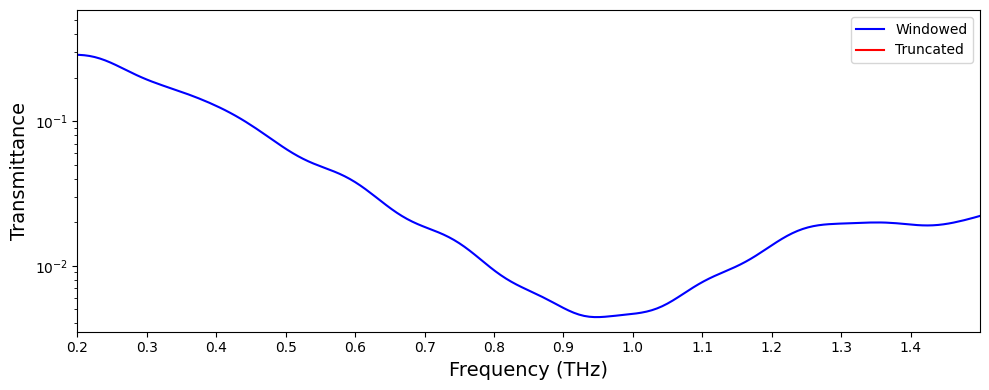

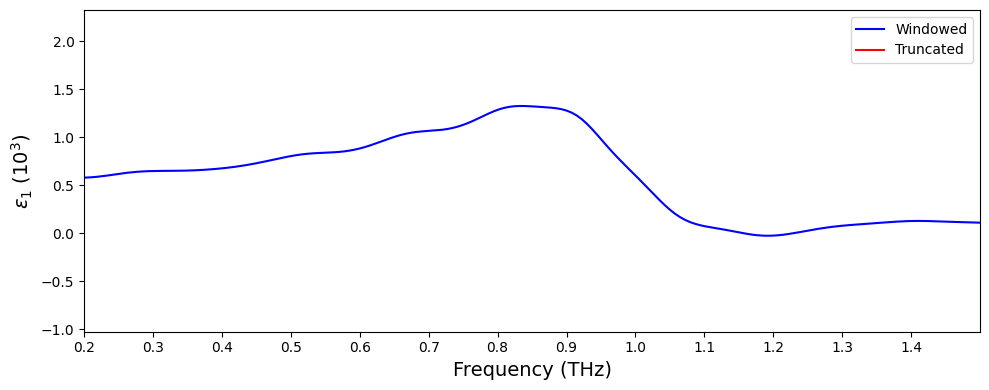

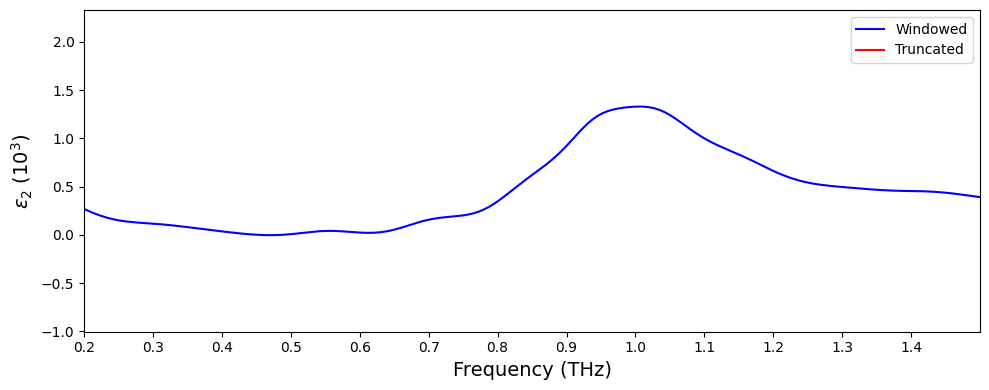

In [156]:
ref_df = dict_with_mean_dfs_substrato_10_10['260K'][0]
sample_df = dict_with_mean_dfs_PbTe_10_10['260K'][0]
tf = sample_df['time_moment'][600]

N_zero_padding = 1000
# sample_df = pd.DataFrame({'time_moment': np.arange(0, time_step * (N_zero_padding-1), time_step), 'X': pd.concat([sample_df['X'], pd.Series(0, index = range(N_zero_padding - N))])})
# print(len(pd.concat([sample_df['X'], pd.Series(0, index = range(N_zero_padding))])))
# print(len(sample_df))
# def gaussian_window(x, x_0, sigma, A):
#     return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))
# params = [10e-12, 3e-12, 1e-10]
sigma = 100*time_step


freqs, T, e_film = apply_window_v2(ref_df, sample_df, 10.7, 11.12, 4001, 'gaussian', [sigma*.9], 2.56, 0.086*1e-3, 0.0016e-3, False,plots_array=[True]*10)

In [88]:
def plot_permissividade_por_temperatura(dict_amostra, dict_ref):
    # 2 subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
    
    # Configure color mapping (Normalize from 10K to 300K)
    norm = mcolors.Normalize(vmin=10, vmax=300)
    cmap = plt.cm.jet # Can change to 'viridis', 'plasma', etc.
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) # Necessary for the colorbar to work
    # Sort keys based on temperature (second element of the list)
    sorted_keys = sorted(dict_amostra.keys(), key=lambda k: dict_amostra[k][1])

    e_maxs_mins = []
    for key in sorted_keys:
        if key not in dict_ref: continue # Safety check in case a key is missing

        # Unpack the data
        df_sample, temp = dict_amostra[key]
        df_ref, _ = dict_ref[key]
        
        # Call the calculation function
        freqs, T, e_film = apply_window_v2(df_ref, df_sample, 10, 11.12, 4001, 'flattop', [800], 2.56, 0.086*1e-3, 0.0016e-3, plots_array=[False]*10)
        e_maxs_mins.append([np.max(np.real(e_film)), np.max(np.imag(e_film)), np.min(np.real(e_film)), np.min(np.imag(e_film))])
        
        # Define a color based on temperature
        color = cmap(norm(temp))
        
        # Plot Real and Imaginary parts
        ax1.plot(freqs*1e-12, np.real(e_film)/1000, color=color)
        ax2.plot(freqs*1e-12, np.imag(e_film)/1000, color=color)

    # Visual settings for Axis 1 (Real)
    ax1.set_title(r"Real Part of $\epsilon$")
    ax1.set_xlabel("Frequency (THz)")
    ax1.set_ylabel(r"$\epsilon_1$ $\times$ $10^3$")
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim((0.2, 1.5))
    ax1.set_ylim((min([e[2]/1000 for e in e_maxs_mins]) - 3, max([e[0]/1000 for e in e_maxs_mins]) + 3))

    # Visual settings for Axis 2 (Imaginary)
    ax2.set_title(r"Imaginary Part of $\epsilon$")
    ax2.set_xlabel("Frequency (THz)")
    ax2.set_ylabel(r"$\epsilon_2$ $\times$ $10^3$")
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim((0.2, 1.5))
    ax2.set_ylim((min([e[3]/1000 for e in e_maxs_mins]) - 3, max([e[1]/1000 for e in e_maxs_mins]) + 3))

    # Add the colorbar
    cbar = fig.colorbar(sm, ax=[ax1, ax2], aspect=30)
    cbar.set_label('Temperature (K)')

    plt.show()

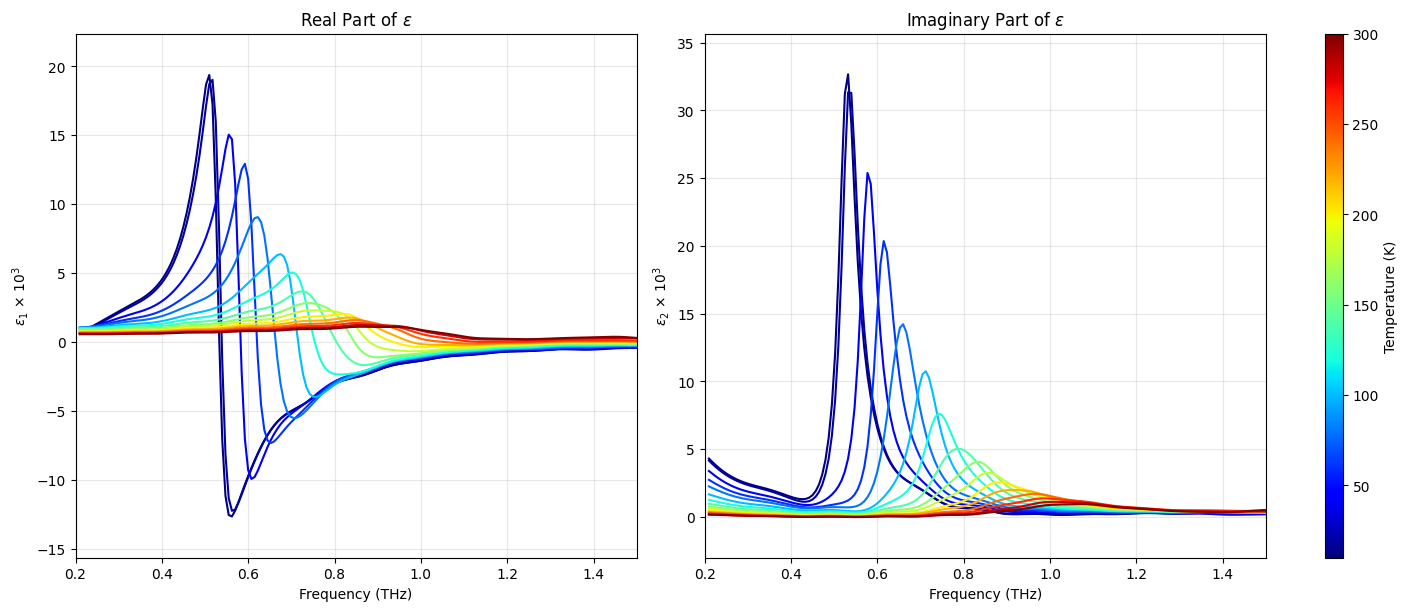

In [89]:
plot_permissividade_por_temperatura(dict_with_mean_dfs_PbTe_10_10, dict_with_mean_dfs_substrato_10_10)

In [ ]:
def fit_permittivity_model(freqs, e_film, model='Drude-Lorentz', initial_params=None):
    """
    Fit the complex permittivity data to a specified model.

    Parameters
    ----------
    freqs : numpy.ndarray
        Frequency array (Hz).
    e_film : numpy.ndarray
        Complex permittivity array.
    model : str
        The model to fit. Currently supports 'Drude-Lorentz'.
    initial_params : list
        Initial guess for the model parameters.

    Returns
    -------
    popt : numpy.ndarray
        Optimal values for the model parameters.
    pcov : numpy.ndarray
        Covariance matrix.
    """
    
    if model != 'Drude-Lorentz':
        raise ValueError("Currently, only 'Drude-Lorentz' model is supported.")
    if initial_params is None:
        raise ValueError("Initial parameters must be provided for fitting.")
    
    params, covariance = curve_fit(drude_lorentz_model, freqs, np.hstack([np.real(e_film), np.imag(e_film)]), p0=initial_params)
    return params, covariance
    

def drude_lorentz_model(freqs, epsilon_inf, epsilon_s, nu_TO, gamma_TO, nu_p, gamma):
    """
    Drude-Lorentz model for complex permittivity.

    Parameters
    ----------
    freqs : numpy.ndarray
        Frequency array (Hz).
    params : list
        List of parameters for the Drude-Lorentz model:
        [epsilon_inf, omega_p, gamma, omega_0, f]

    Returns
    -------
    numpy.ndarray
        Complex permittivity calculated using the Drude-Lorentz model.
    """

    epsilon = epsilon_inf + (epsilon_s - epsilon_inf) * nu_TO ** 2 / (nu_TO ** 2 - freqs ** 2 - 1j * freqs * gamma_TO) - (nu_p ** 2) / (freqs ** 2 + 1j * freqs * gamma)
    return np.hstack([np.real(epsilon), np.imag(epsilon)])

C:\Users\estra\AppData\Local\Temp\ipykernel_23420\501262995.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)


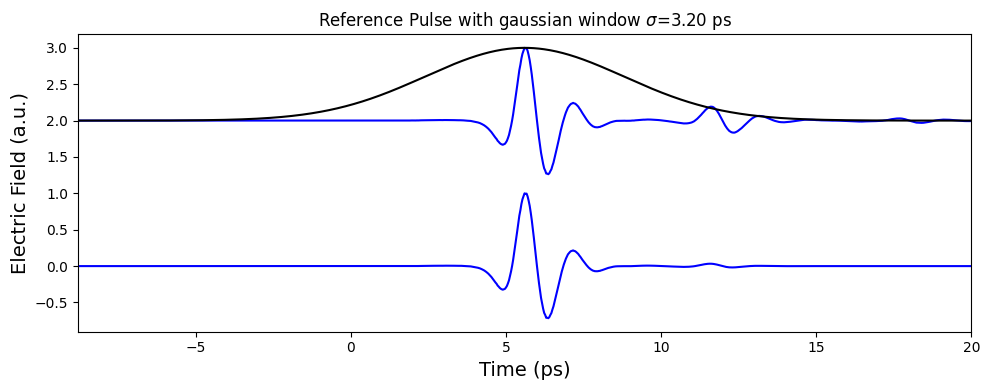

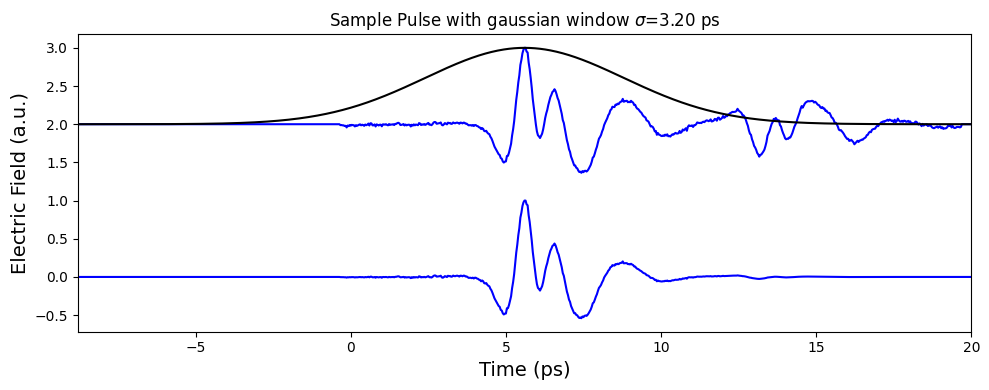

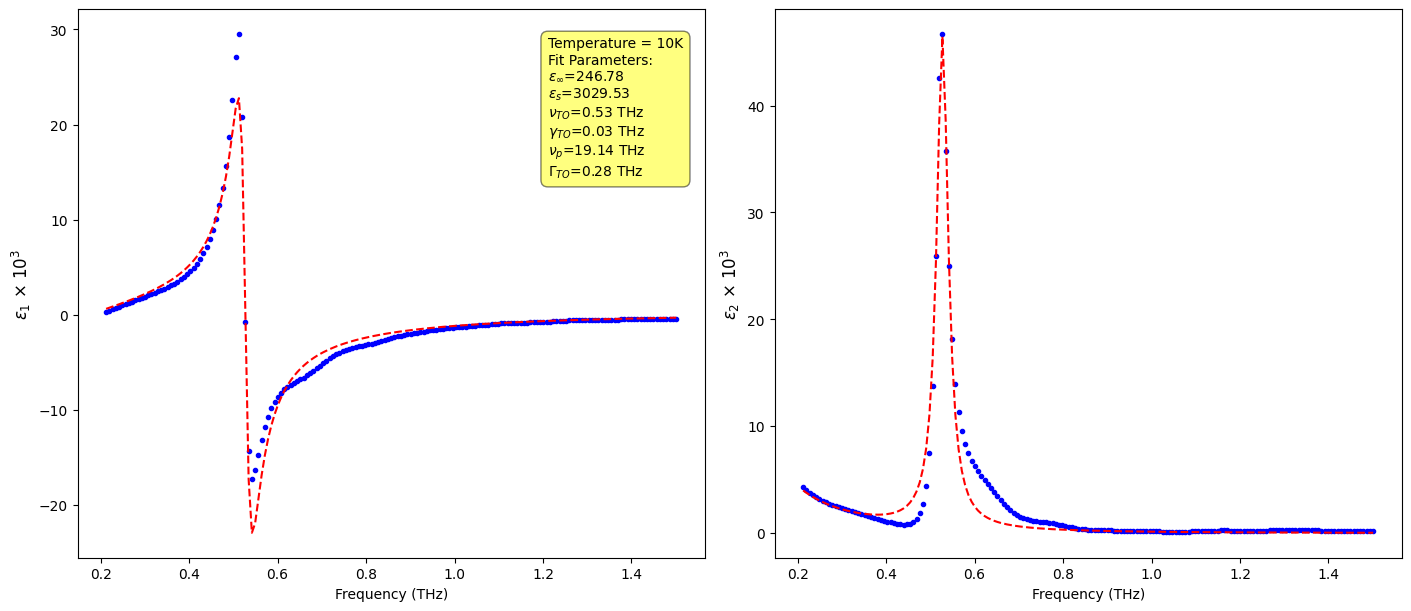

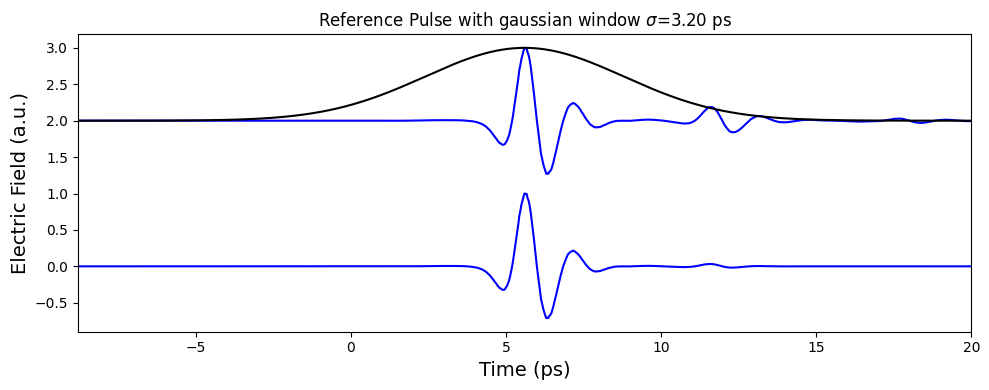

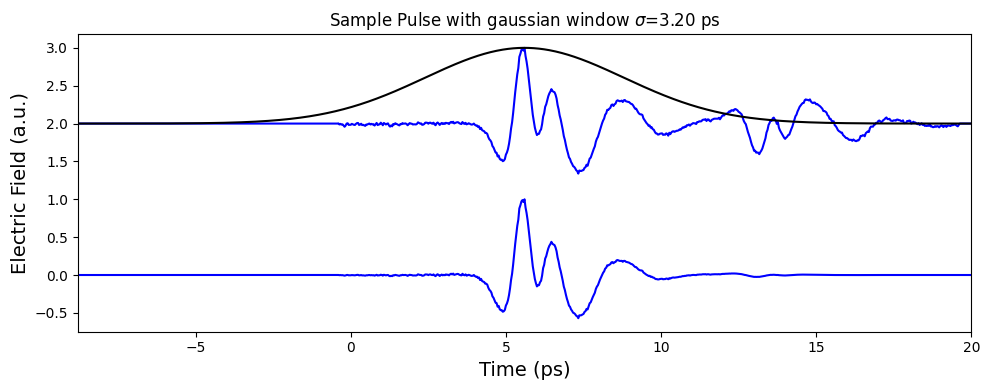

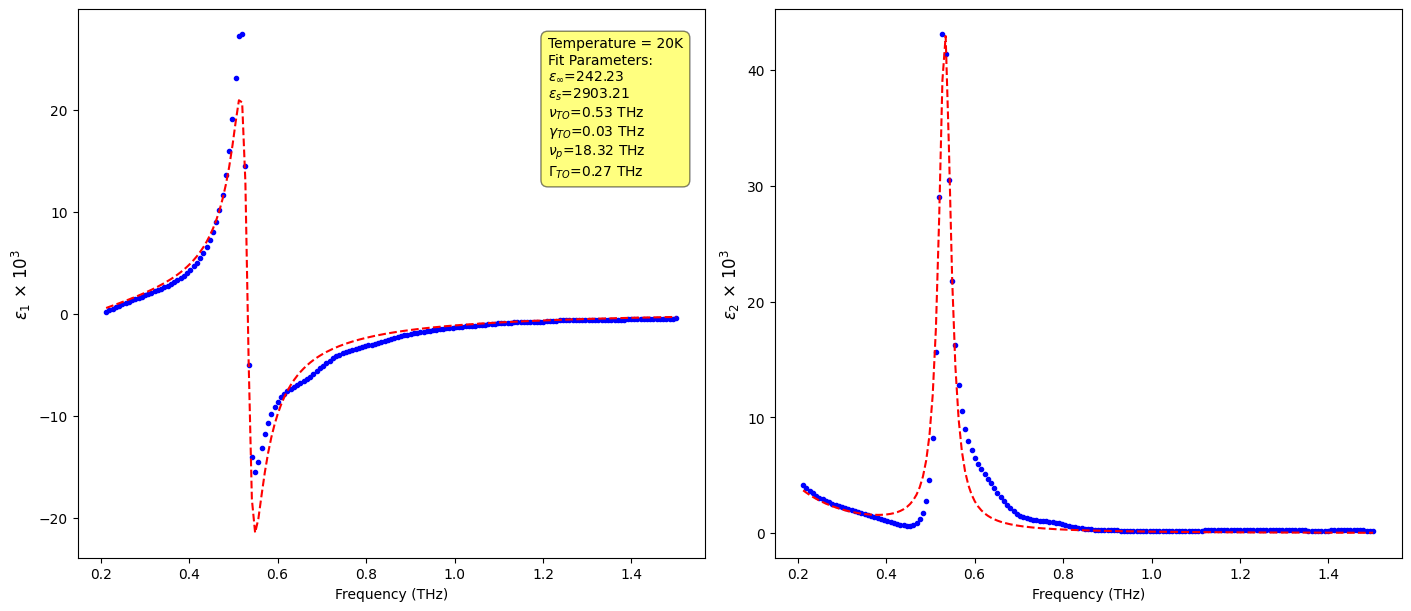

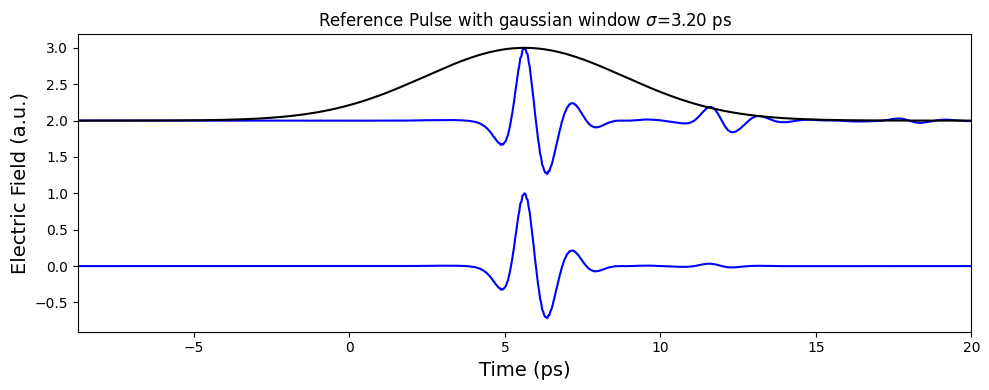

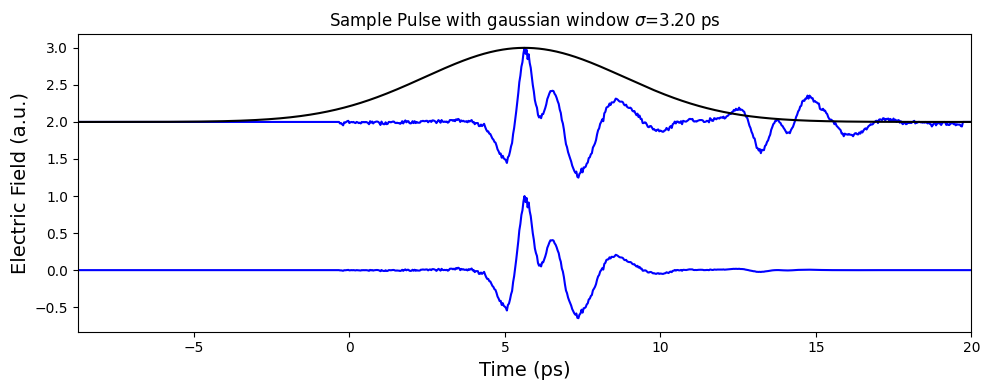

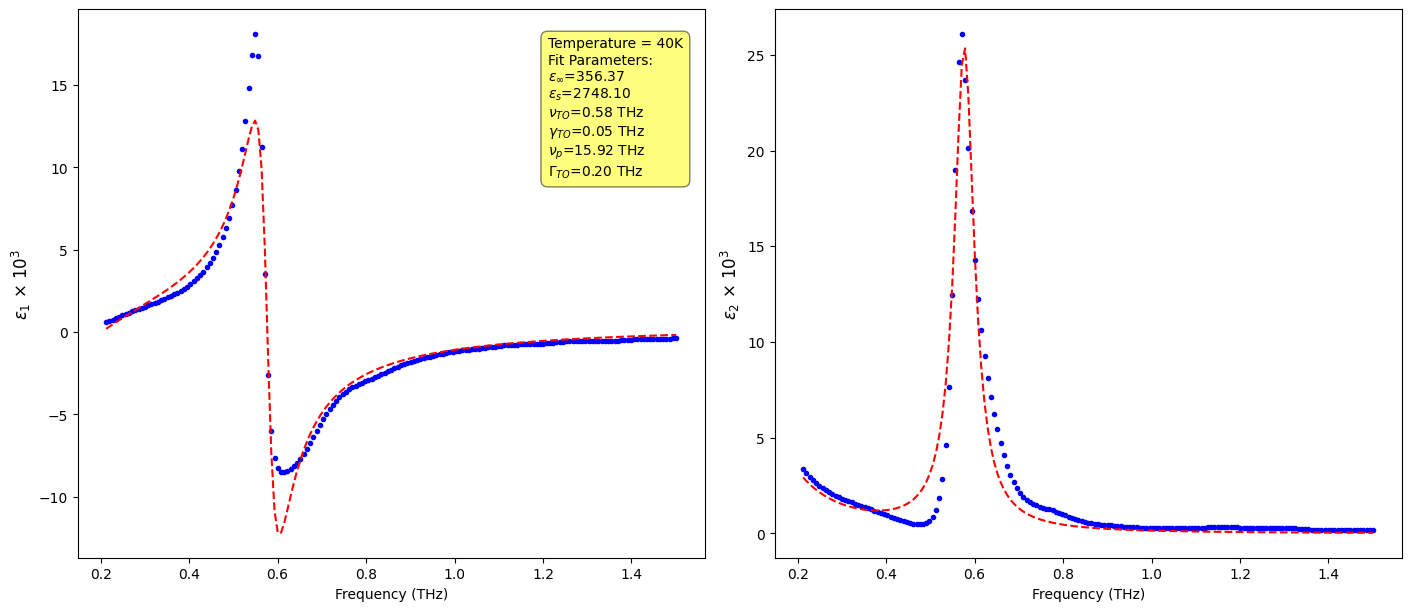

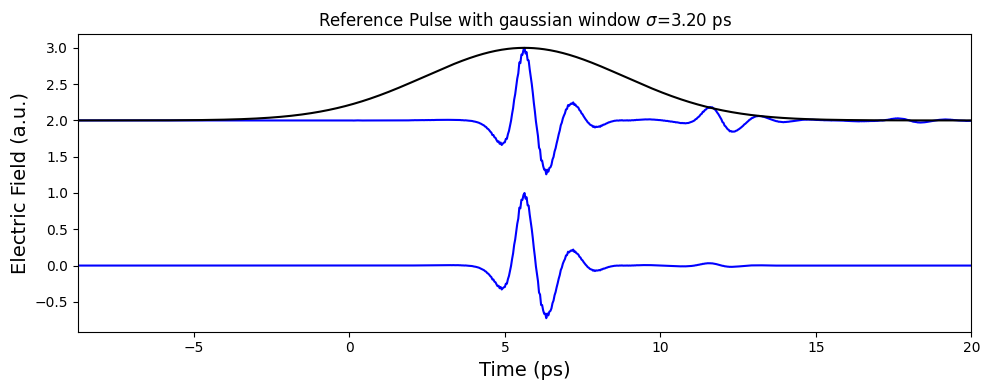

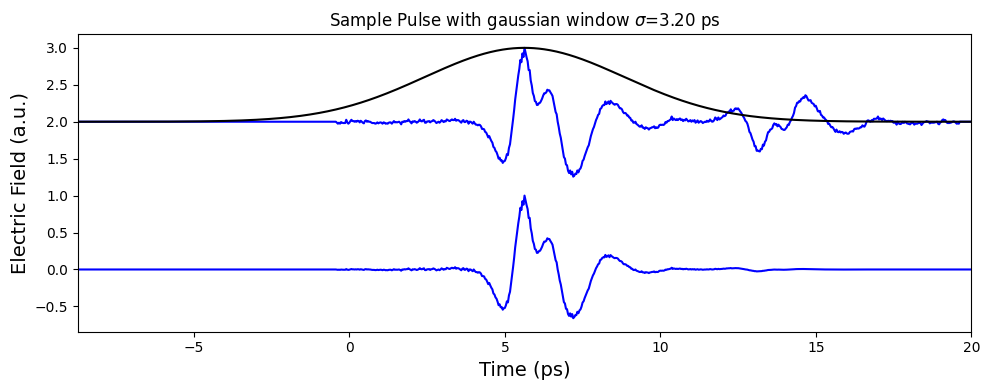

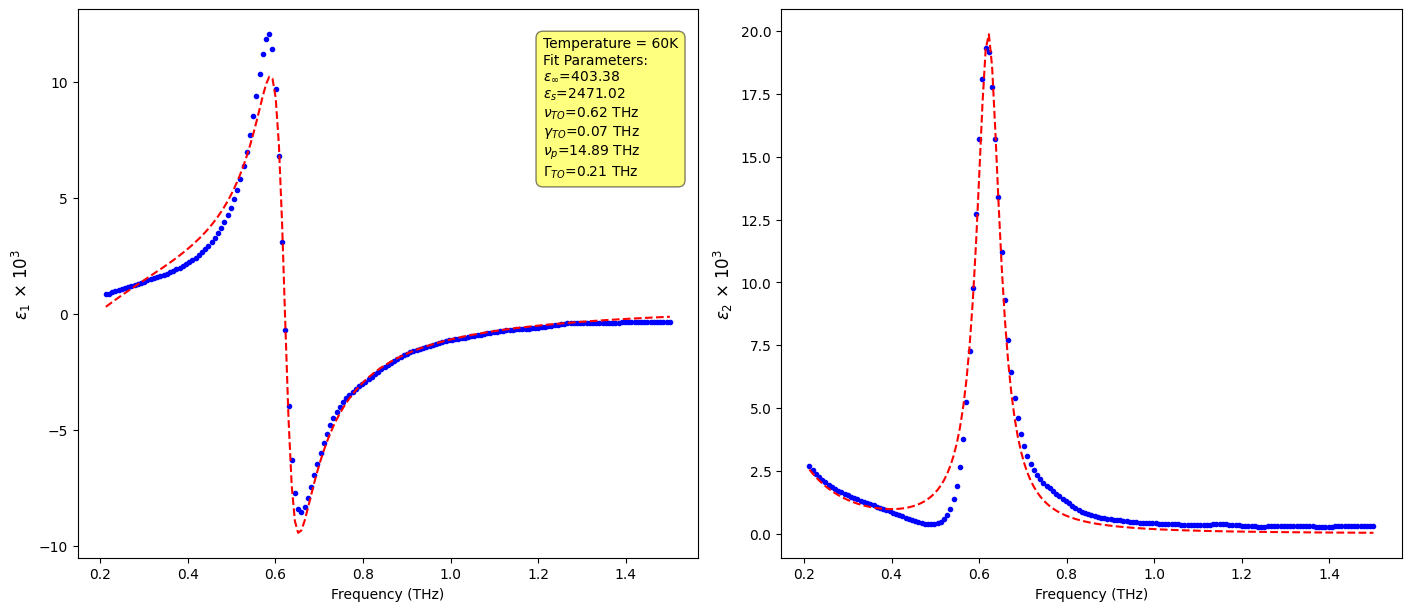

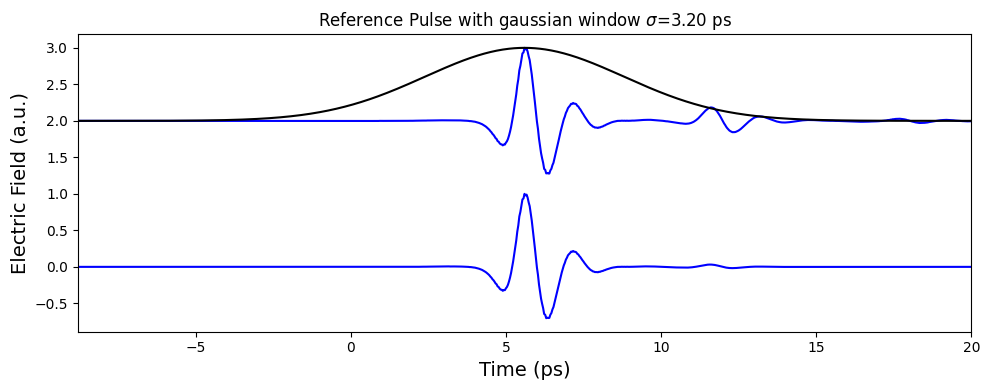

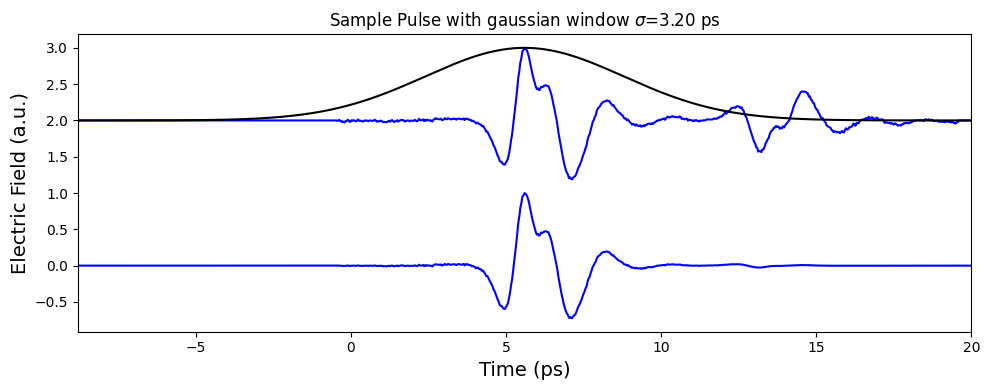

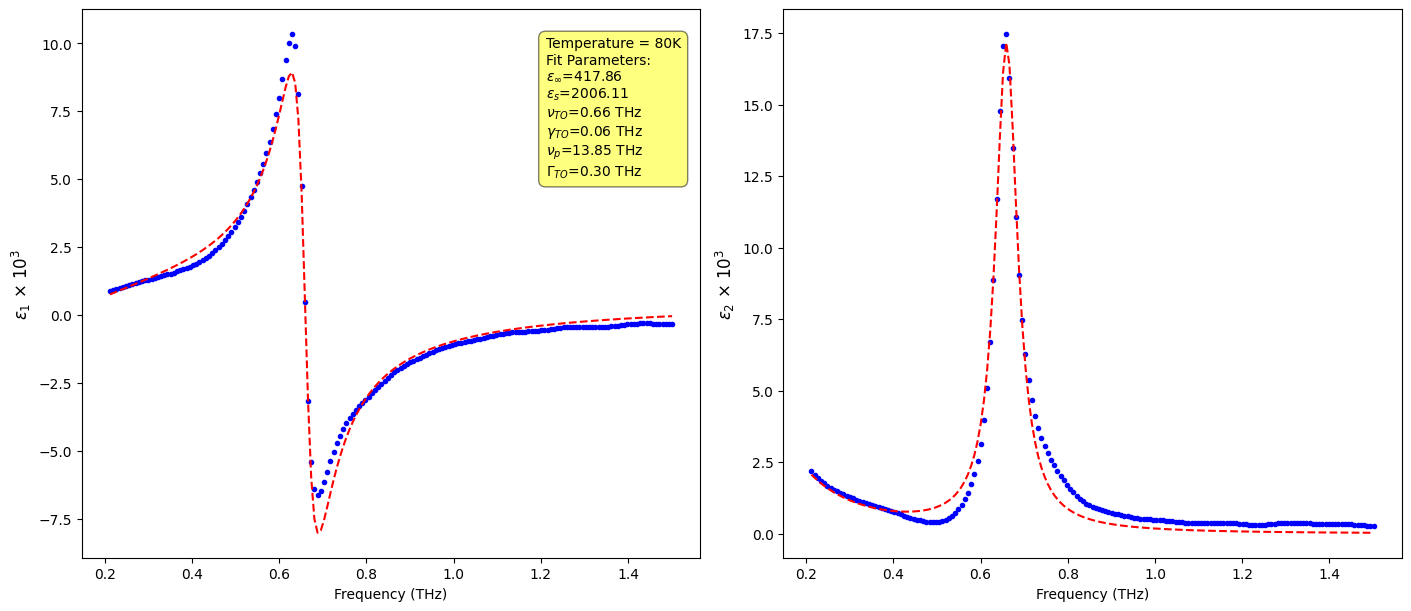

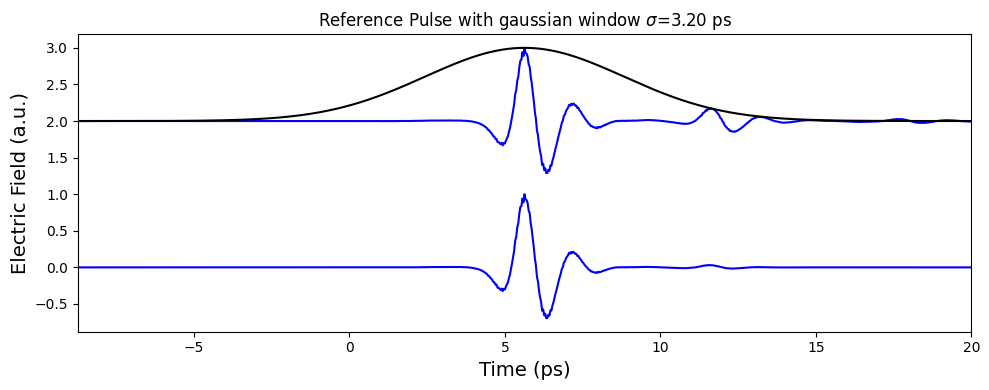

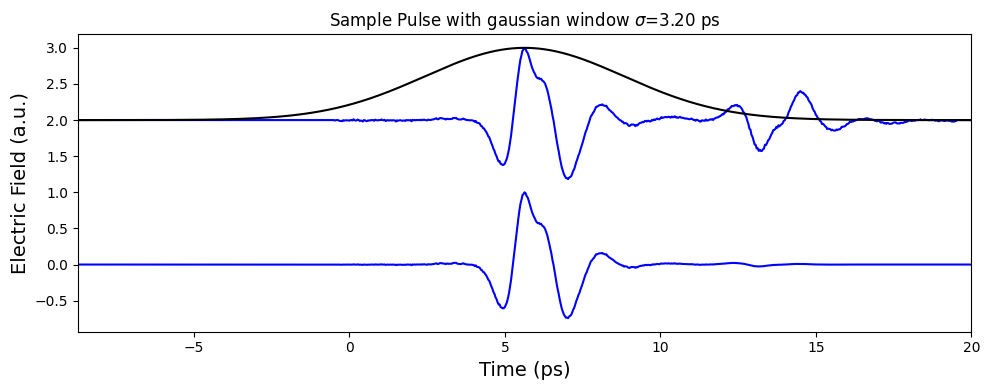

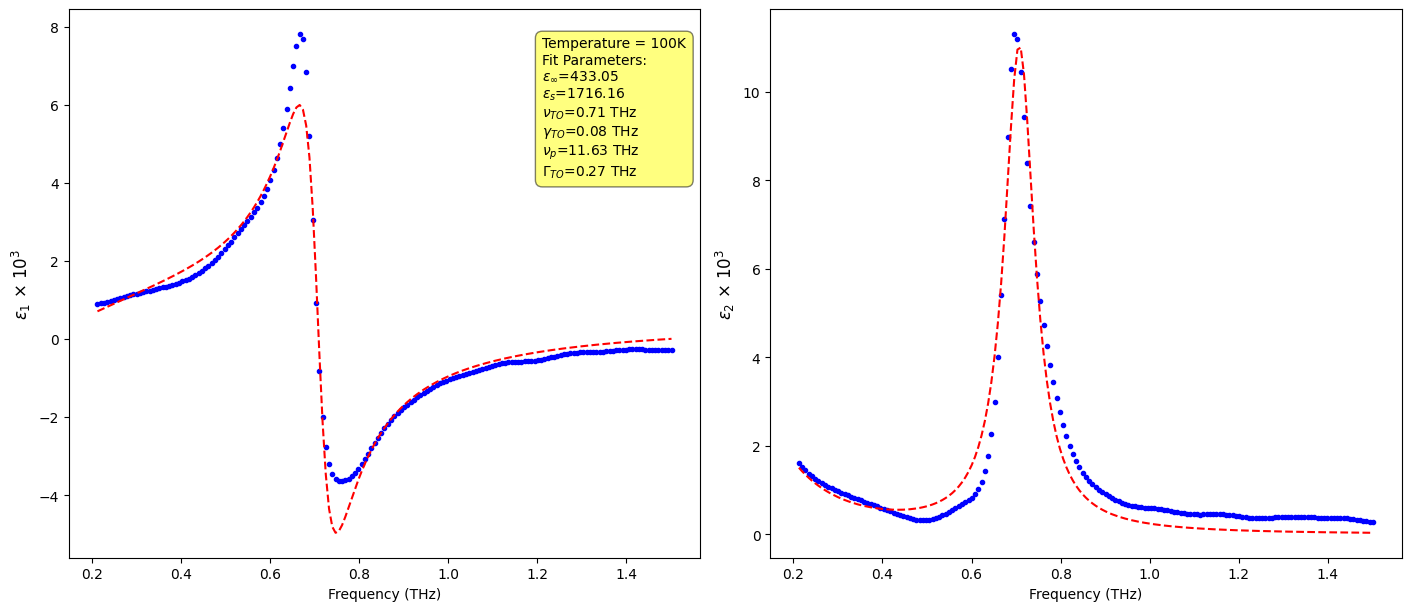

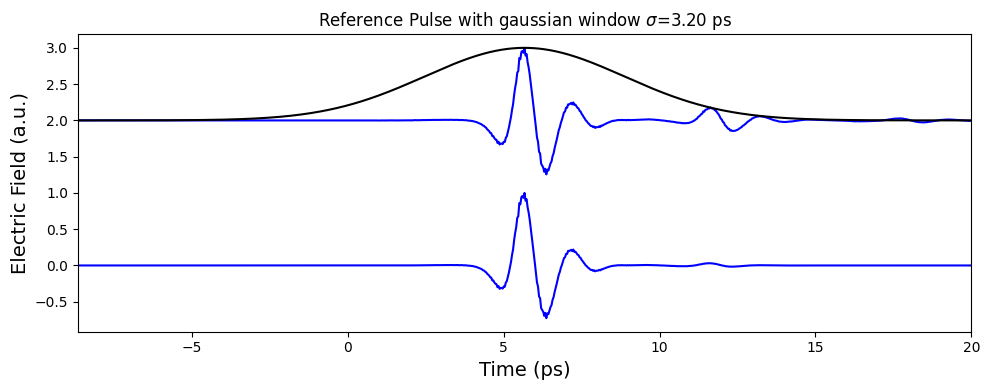

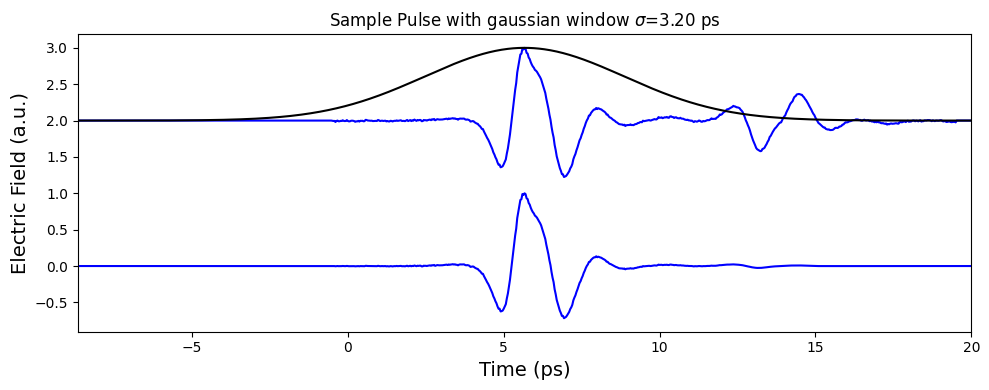

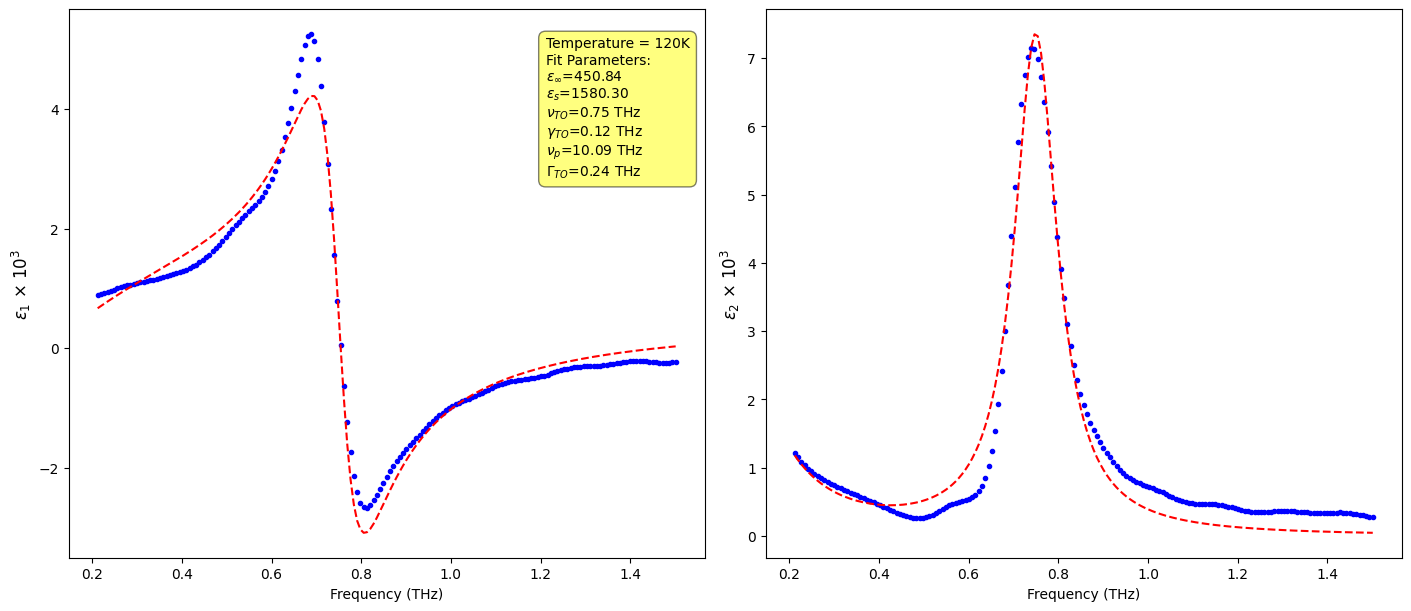

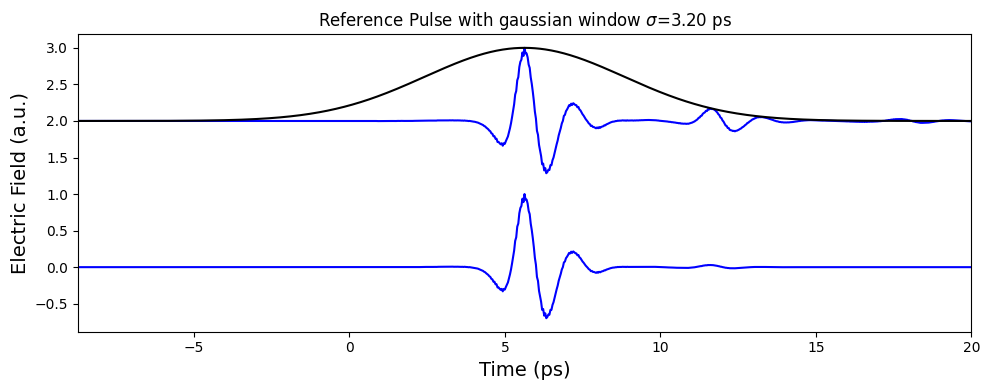

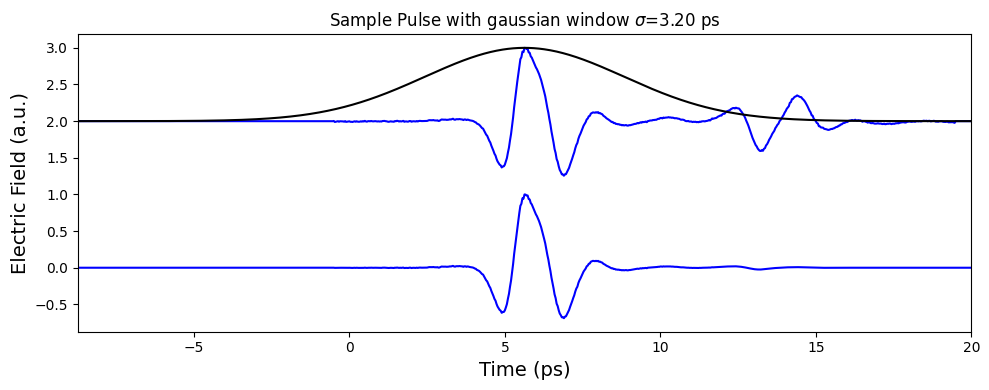

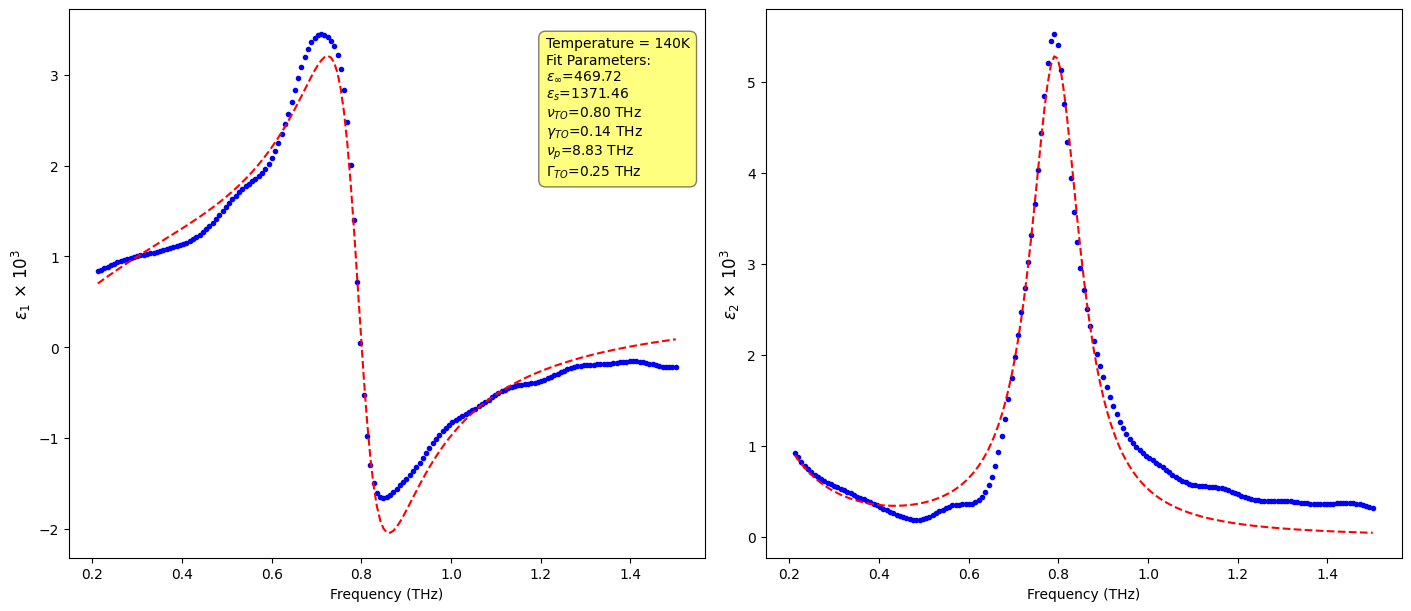

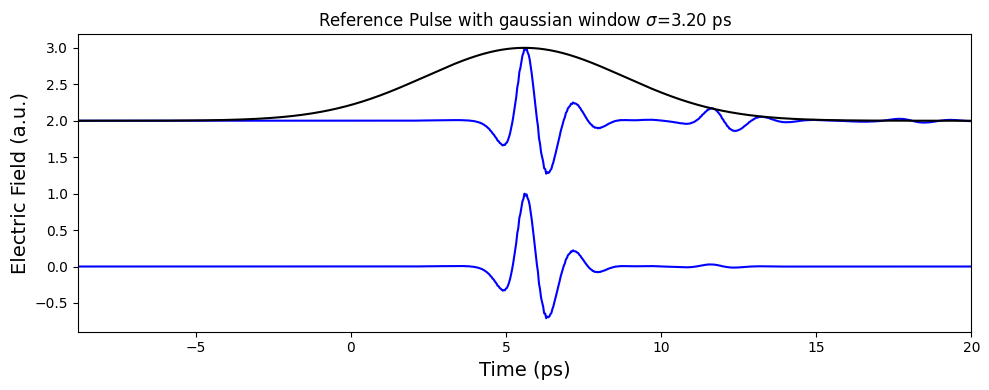

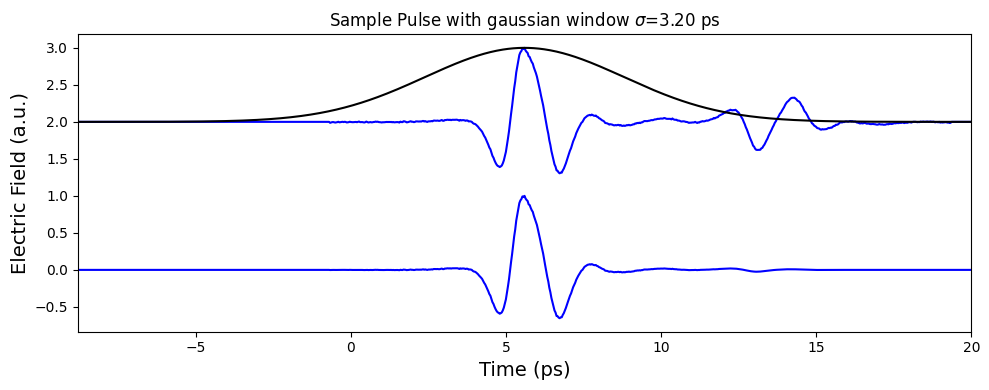

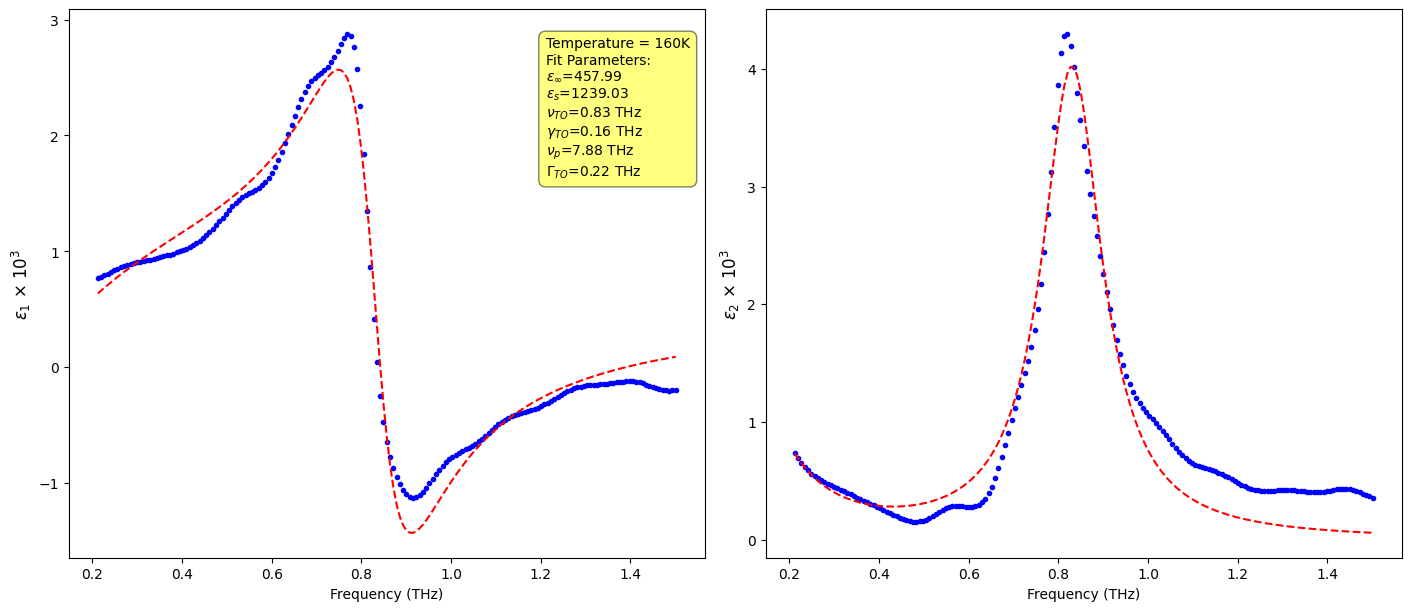

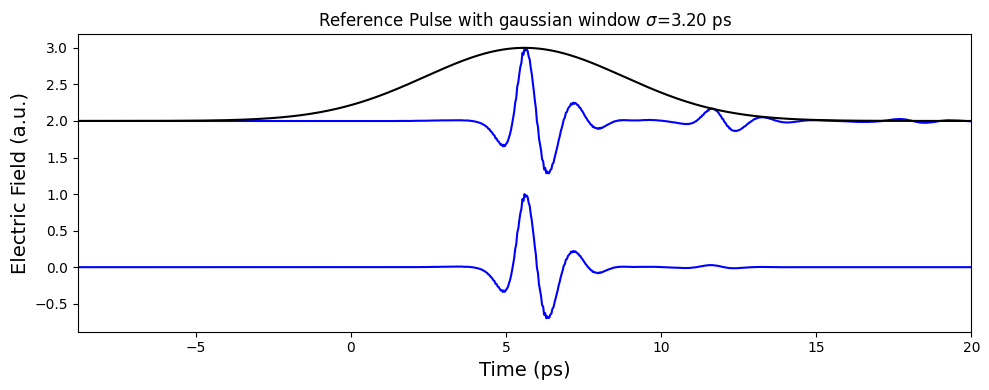

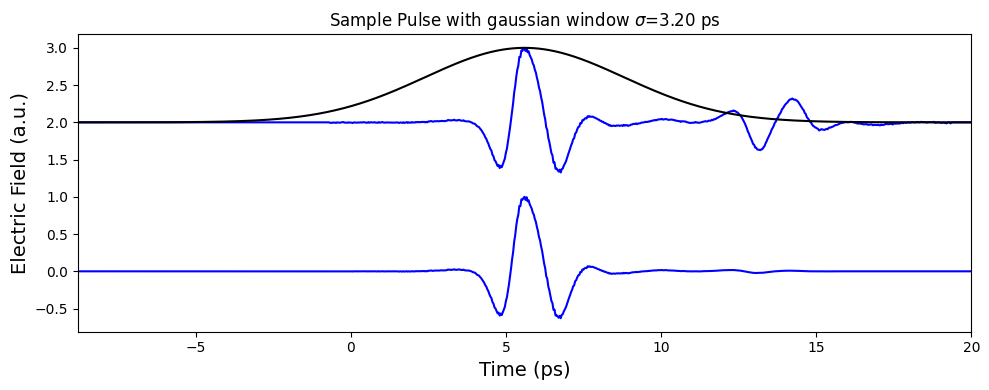

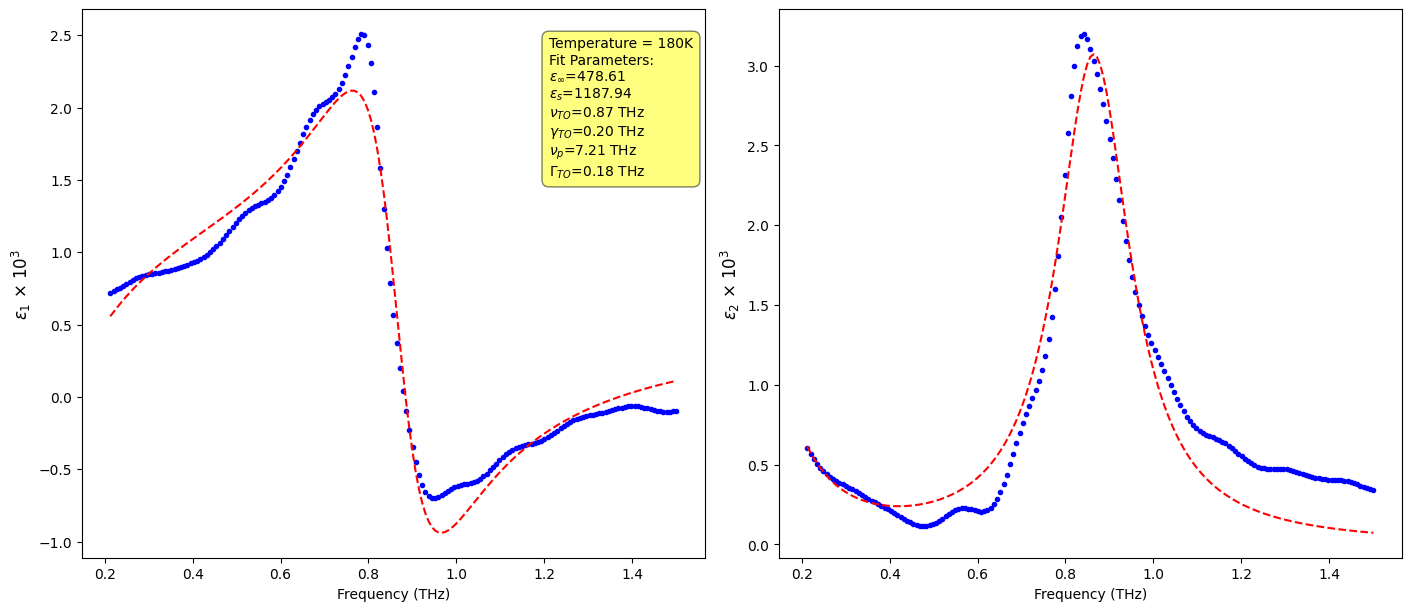

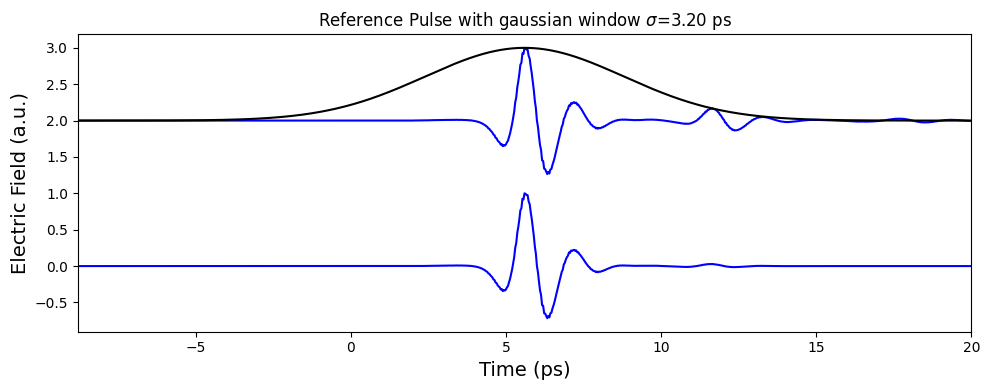

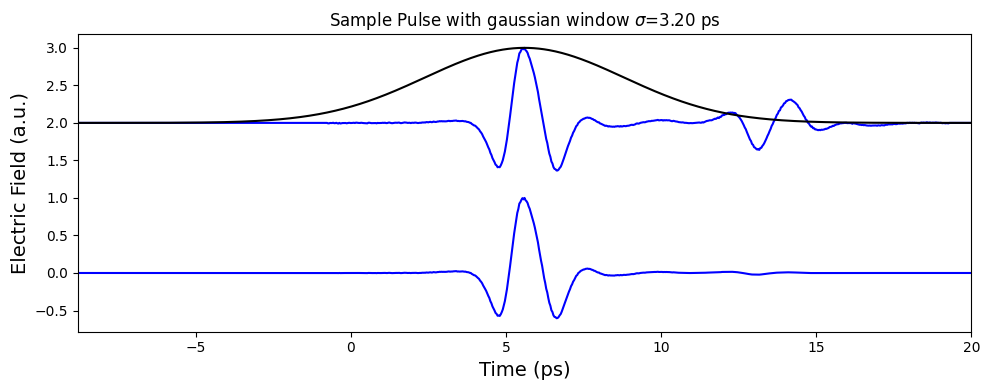

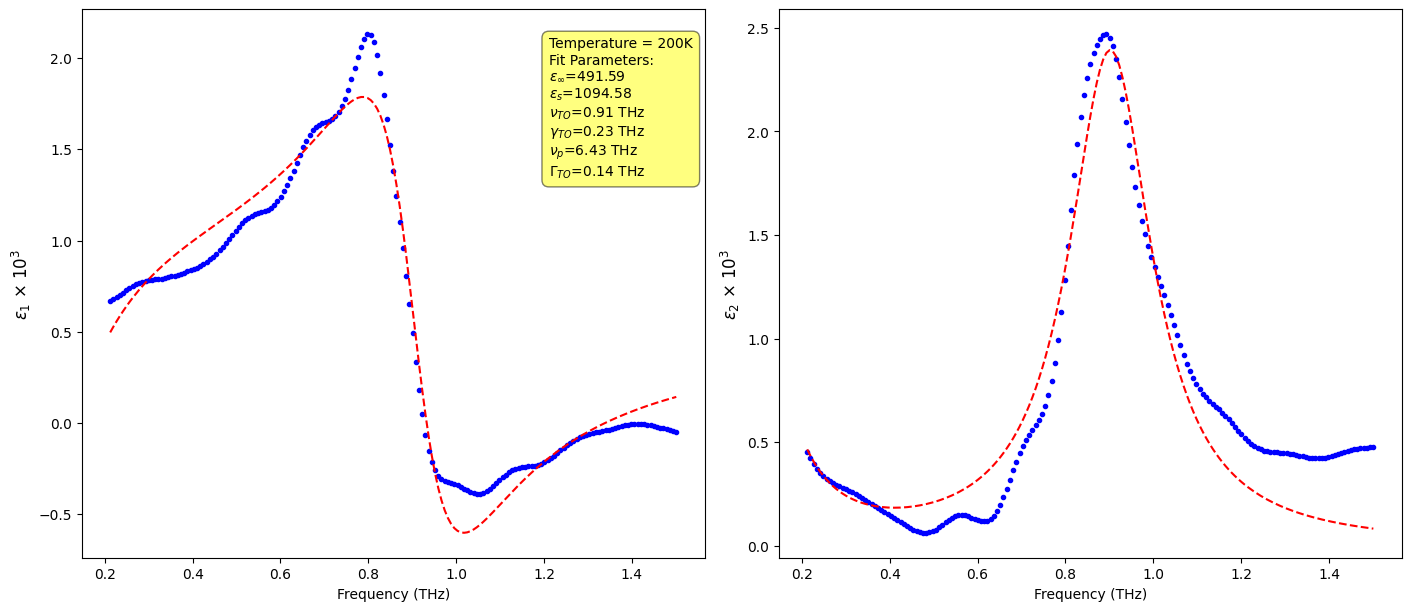

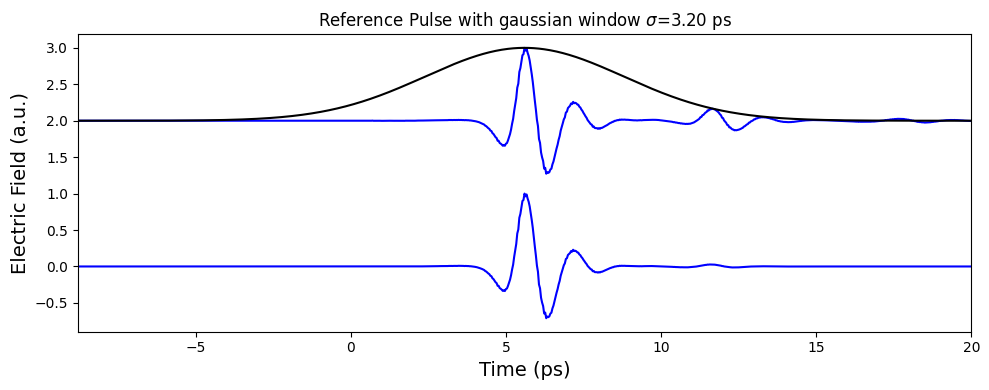

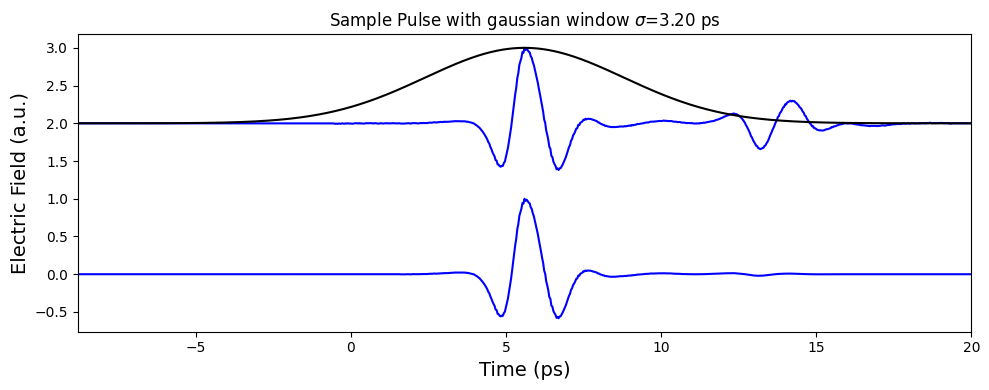

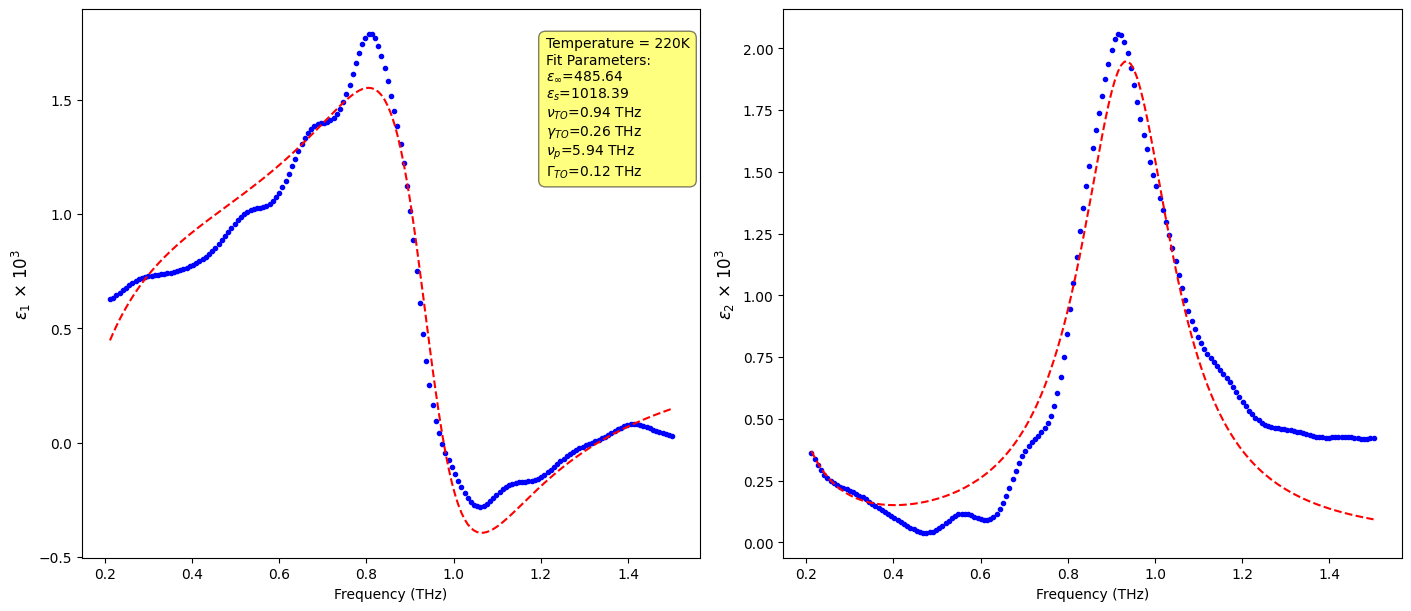

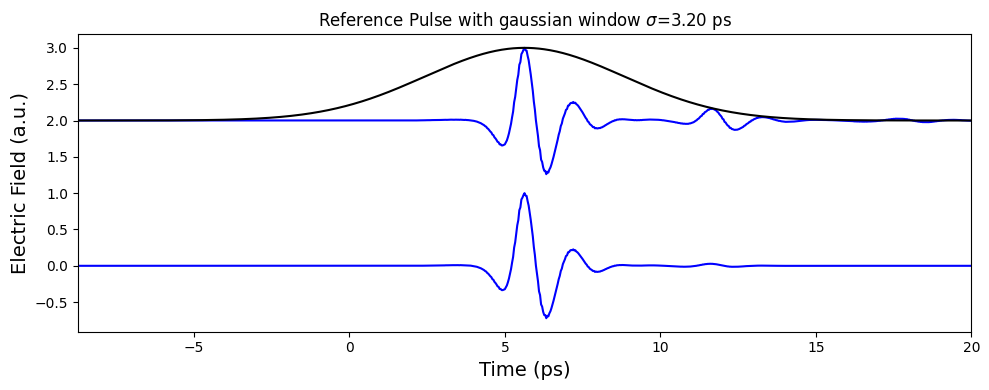

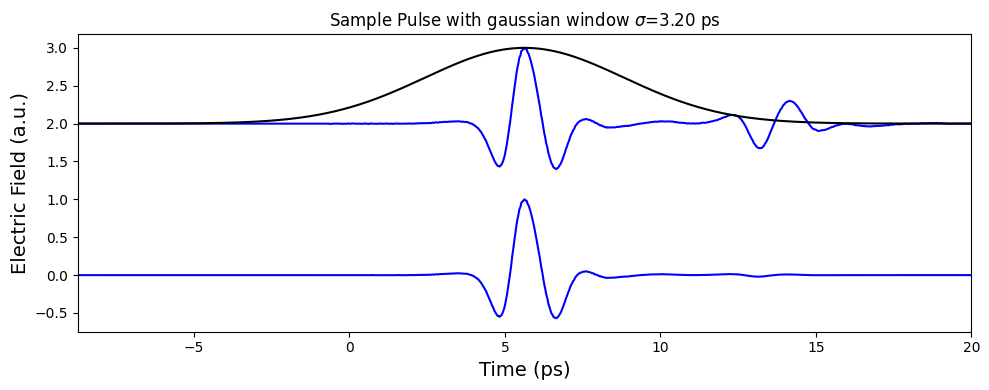

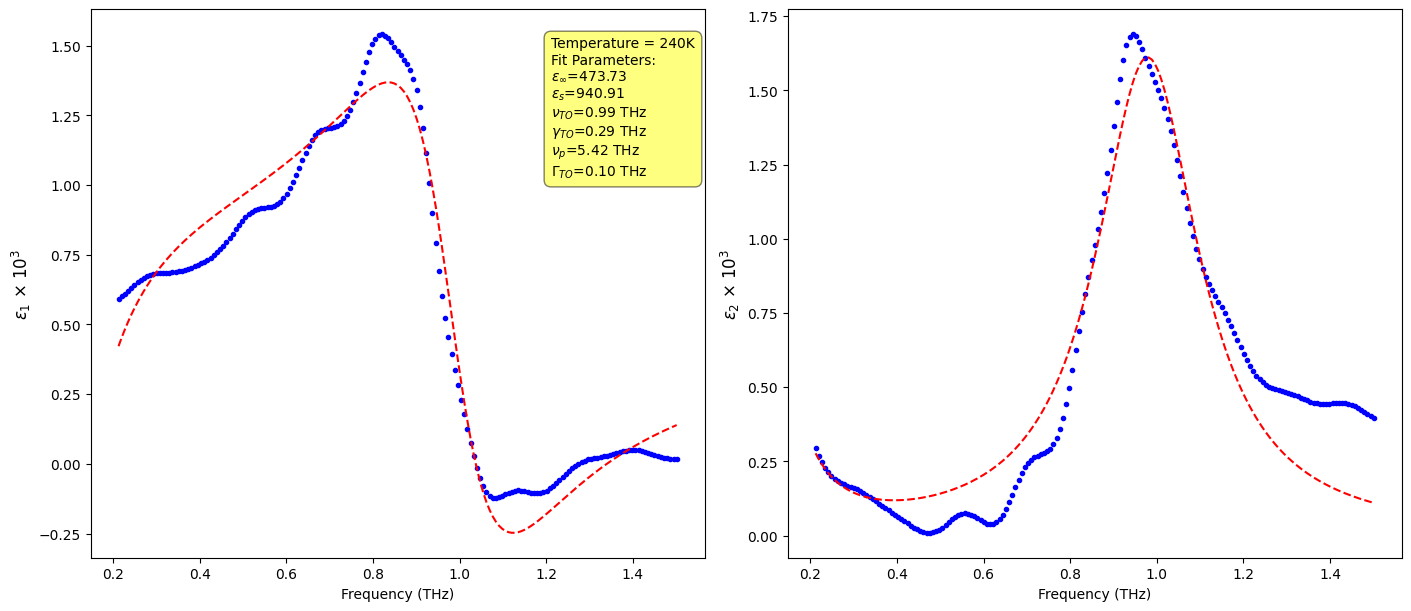

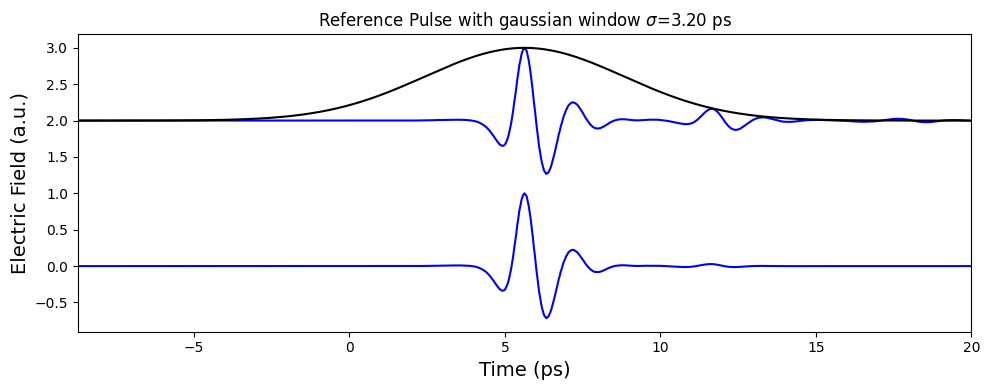

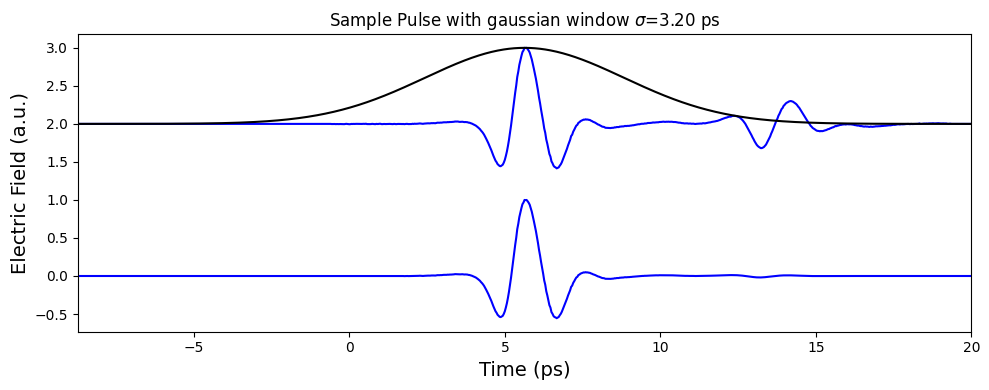

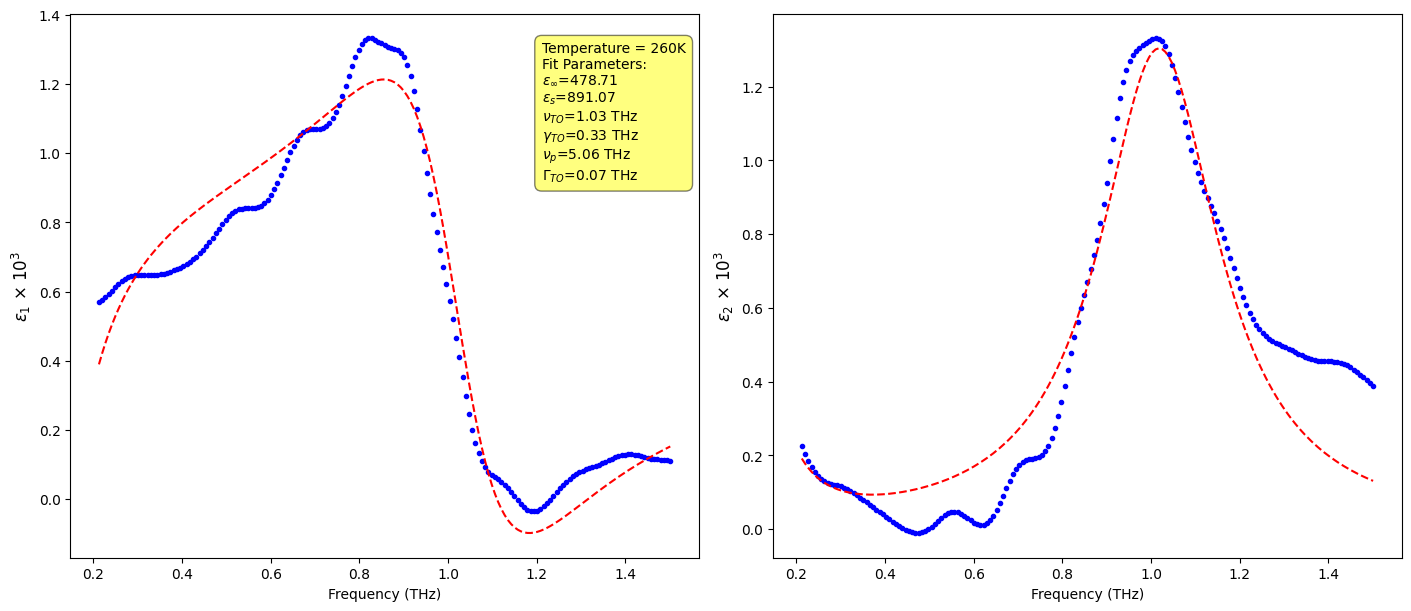

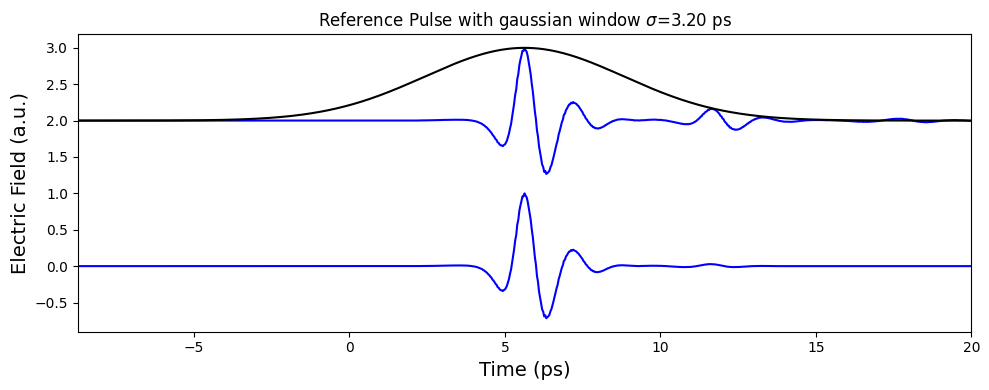

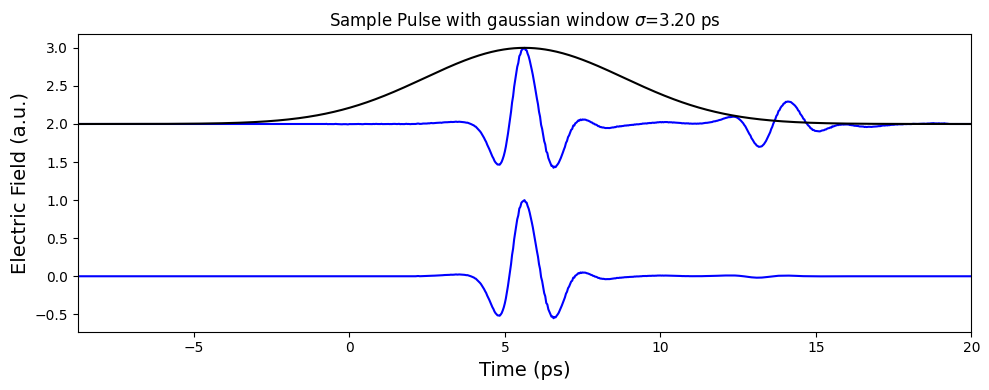

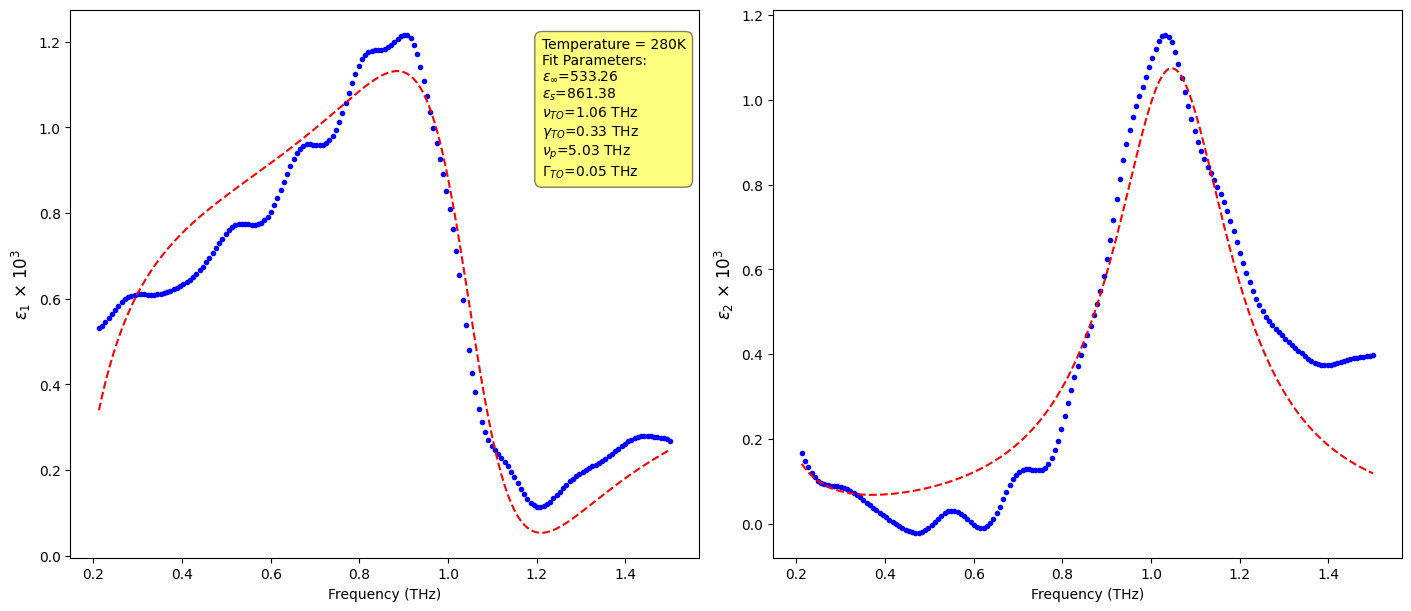

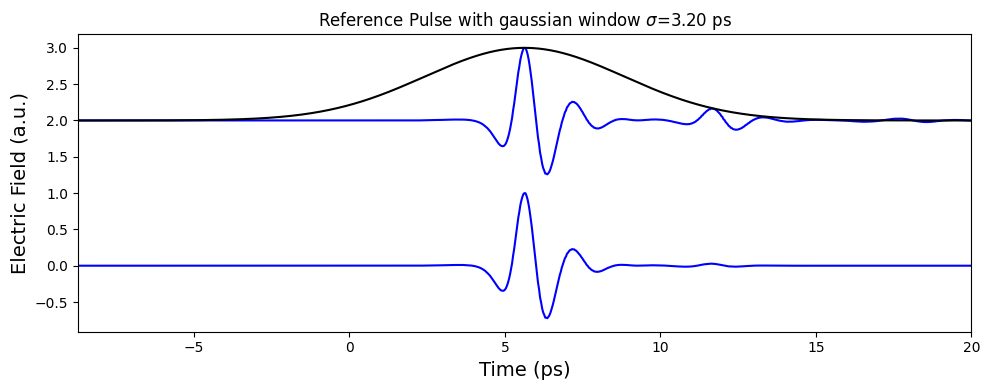

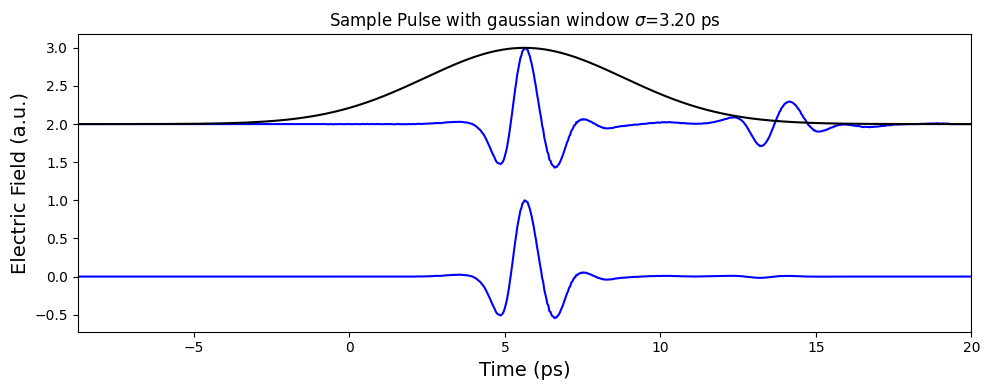

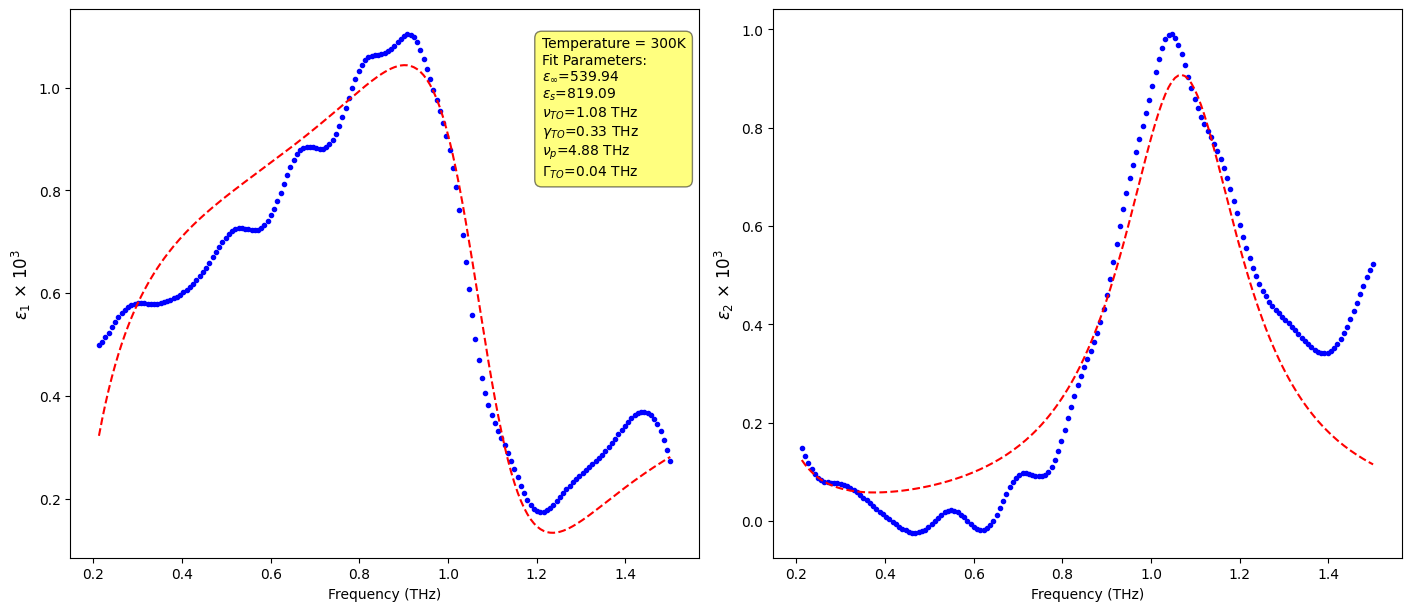

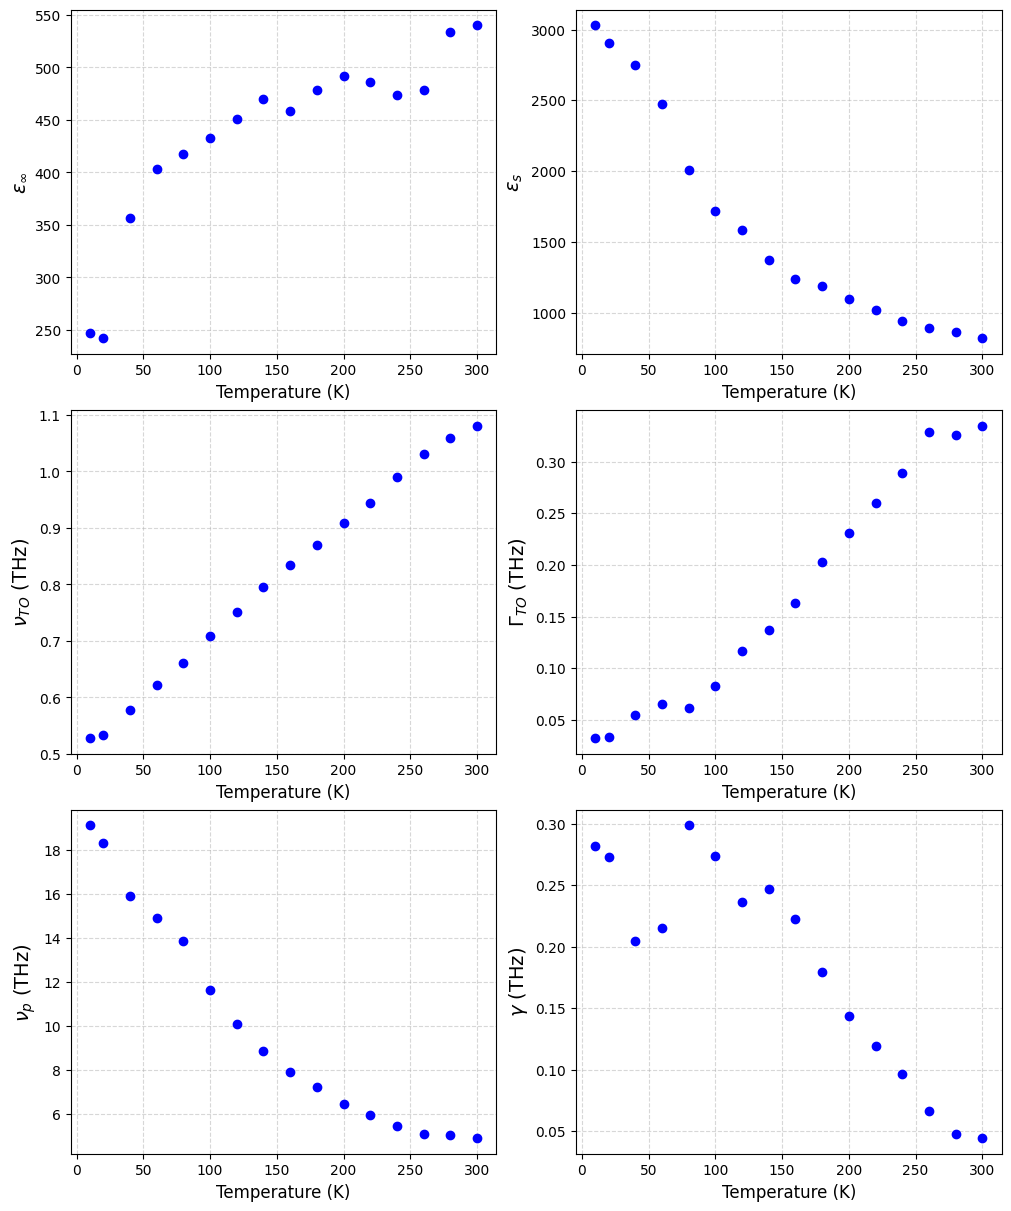

In [168]:
sorted_keys = sorted(dict_with_mean_dfs_PbTe_10_10.keys(), key=lambda k: dict_with_mean_dfs_PbTe_10_10[k][1])
#    epsilon_inf, epsilon_s, nu_TO, gamma_TO, nu_p, gamma
p0 = [5000, 10000, 0.5e12, 0.1e12, 40e12, 0.3e12]  # Initial guess for parameters
opt_params_per_temp = {}
plot_arrays = [False, False, False, True, True, False, False, False, False, False]
for key in sorted_keys:
    if key not in dict_with_mean_dfs_substrato_10_10: continue # Safety check in case a key is missing

    # Unpack the data
    df_sample, temp = dict_with_mean_dfs_PbTe_10_10[key]
    df_ref, _ = dict_with_mean_dfs_substrato_10_10[key]
    
    # Call the calculation function
    freqs, T, e_film = apply_window_v2(df_ref, df_sample, 10, 11.12, 2**12+1, 'gaussian', [time_step*96], 2.56, 0.086*1e-3, 0.0016e-3, plots_array=plot_arrays)

    # Fit the model
    popt, pcov = fit_permittivity_model(freqs, e_film, model='Drude-Lorentz', initial_params=p0)
    opt_params_per_temp[temp] = popt
    p0 = popt  # Update initial guess for next temperature
    
    # plot the results
    fitted_epsilon = drude_lorentz_model(freqs, *popt)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
    ax1.plot(freqs*1e-12, np.real(e_film)/1000, 'b.', label='Data')
    ax1.plot(freqs*1e-12, fitted_epsilon[:len(freqs)]/1000, 'r--', label='Fit')
    ax1.annotate(
        f'Temperature = {temp}K\n' +
        f'Fit Parameters:\n' +
        r'$\epsilon_\infty$' + f'={popt[0]:.2f}\n' +
        r'$\epsilon_s$' + f'={popt[1]:.2f}\n' +
        r'$\nu_{TO}$' + f'={popt[2]*1e-12:.2f} THz\n' +
        r'$\gamma_{TO}$' + f'={popt[3]*1e-12:.2f} THz\n' +
        r'$\nu_{p}$' + f'={popt[4]*1e-12:.2f} THz\n' +
        r'$\Gamma_{TO}$' + f'={popt[5]*1e-12:.2f} THz',
        xy=(0.75, 0.95), xycoords='axes fraction',
        fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
    )
    # ax1.set_title(r"Real Part of $\epsilon$ at " + f"{temp}K")
    ax1.set_ylabel(r"$\epsilon_1$ $\times$ $10^3$", fontsize = 12)
    ax1.set_xlabel("Frequency (THz)")

    ax2.plot(freqs*1e-12, np.imag(e_film)/1000, 'b.', label='Data')
    ax2.plot(freqs*1e-12, fitted_epsilon[len(freqs):]/1000, 'r--', label='Fit')
    # ax2.set_title(r"Imaginary Part of $\epsilon$ at " + f"{temp}K")
    ax2.set_ylabel(r"$\epsilon_2$ $\times$ $10^3$", fontsize = 12)
    ax2.set_xlabel("Frequency (THz)")

fig, axs = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=True)
ylabels = [r'$\epsilon_\infty$', r'$\epsilon_s$', r'$\nu_{TO}$ (THz)', 
           r'$\Gamma_{TO}$ (THz)', r'$\nu_p$ (THz)', r'$\gamma$ (THz)']

for temp, params in opt_params_per_temp.items():
    vals = [params[0], params[1], *[p * 1e-12 for p in params[2:]]]
    
    
    for ax, val in zip(axs.flat, vals):
        ax.plot(temp, val, 'bo')


for ax, lbl in zip(axs.flat, ylabels):
    ax.set_ylabel(lbl, fontsize=14)
    ax.set_xlabel('Temperature (K)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

    

--- Optimal Parameters ---
   e_inf: 2.40e+02
     e_s: 2.98e+03
   nu_TO: 5.27e+11
  gam_TO: 2.89e+10
    nu_p: 1.93e+13
   gamma: 2.90e+11

--- Covariance Matrix ---
    1.56e+04    1.64e+04   -1.29e+07    7.53e+09    3.68e+13   -1.36e+12
    1.64e+04    1.94e+04   -4.62e+07    3.17e+10    2.57e+13   -2.34e+12
   -1.29e+07   -4.62e+07    5.08e+16    5.23e+15    2.83e+18    9.03e+16
    7.53e+09    3.17e+10    5.23e+15    4.58e+17   -1.17e+20   -1.00e+19
    3.68e+13    2.57e+13    2.83e+18   -1.17e+20    1.11e+24    3.05e+22
   -1.36e+12   -2.34e+12    9.03e+16   -1.00e+19    3.05e+22    2.31e+21


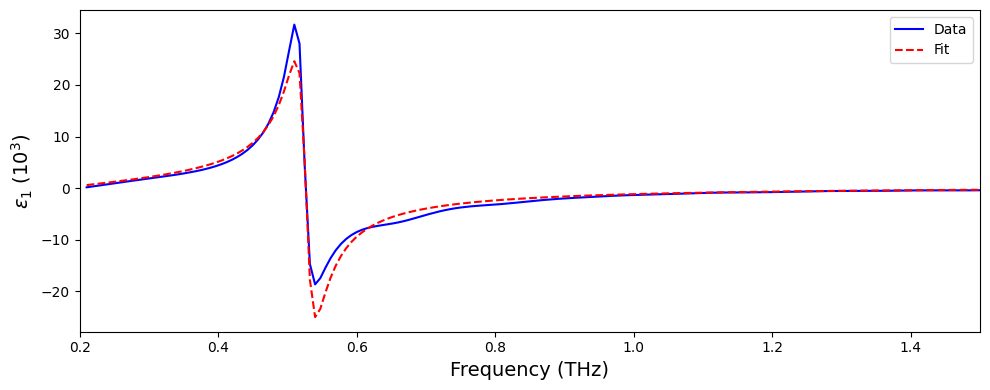

In [100]:
param_names = ['e_inf', 'e_s', 'nu_TO', 'gam_TO', 'nu_p', 'gamma']

print("--- Optimal Parameters ---")
print('\n'.join([f"{name:>8}: {val:.2e}" for name, val in zip(param_names, params_opt)]))

print("\n--- Covariance Matrix ---")
print('\n'.join([''.join([f'{item:12.2e}' for item in row]) 
      for row in params_cov]))

fig, ax8 = plt.subplots(figsize = (10, 4), tight_layout=True)
ax8.plot(freqs*1e-12, np.real(e_film)/1e3, 'b')
ax8.plot(freqs*1e-12, drude_lorentz_model(freqs, *params_opt)[:len(freqs)]/1e3, 'r--')
ax8.set_ylabel(r'$\epsilon_1$ ($10^3$)', fontsize = 14)
ax8.legend(['Data', 'Fit'], fontsize = 10)
ax8.set_xlim((0.2, 1.5))
ax8.set_xlabel('Frequency (THz)', fontsize = 14)

plt.show()